<a href="https://colab.research.google.com/github/VikasEmpire/daa/blob/main/MOdel_dAta_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/lobachevsky-university-electrocardiography-database-1.0.1.zip'
extract_path = '/content/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Successfully extracted {zip_path} to {extract_path}")

Successfully extracted /content/drive/MyDrive/lobachevsky-university-electrocardiography-database-1.0.1.zip to /content/


In [ ]:
!pip install wfdb NeuroKit2
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 123.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.


In [ ]:
import os

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'
file_list = os.listdir(extracted_data_path)
print("Files in the data directory:")
for file_name in file_list:
    print(file_name)

Files in the data directory:
91.ii
80.iii
6.iii
142.avr
113.ii
194.v2
24.v4
183.v3
165.i
197.v5
106.v4
116.v4
12.avl
47.v5
32.iii
171.i
106.v2
170.avf
97.v5
101.avf
22.avr
80.dat
15.v2
58.v5
44.avl
117.v2
110.iii
26.avl
170.avl
18.v6
100.v5
170.v6
25.v1
62.iii
16.v3
132.v2
55.v1
81.avl
120.avf
50.dat
3.avl
69.avf
196.avf
76.avl
42.avr
197.v4
9.i
132.v1
151.v6
157.i
3.avr
91.avl
70.v3
11.hea
85.v3
64.v5
177.ii
198.v6
27.dat
55.v3
115.hea
70.avl
111.v6
171.hea
79.iii
121.avl
121.ii
119.v2
46.avf
152.v4
106.iii
25.v5
96.iii
50.v5
50.iii
62.v6
28.iii
13.dat
15.hea
10.ii
152.avr
33.v5
25.v2
195.v3
178.v1
139.v4
137.avl
162.ii
86.v5
137.iii
68.dat
155.iii
145.avl
151.v2
122.iii
59.v4
74.v5
192.v4
33.v2
178.v2
142.v1
160.v4
149.avf
21.hea
56.iii
79.dat
189.hea
167.iii
23.avr
143.v4
169.hea
108.hea
69.ii
104.iii
47.v4
165.dat
171.dat
150.v6
195.iii
68.v3
5.avf
110.v5
88.i
118.avr
138.v4
168.v3
25.avr
113.v3
158.v5
195.v5
126.avr
109.v6
12.v5
94.v5
174.iii
179.hea
117.v6
72.v2
70.ii
59.avl
37.a

Record metadata:
Record name: 1
Sampling frequency: 500 Hz
Number of leads: 12
Signal length: 5000 samples
Lead names: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']
Units: ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV']


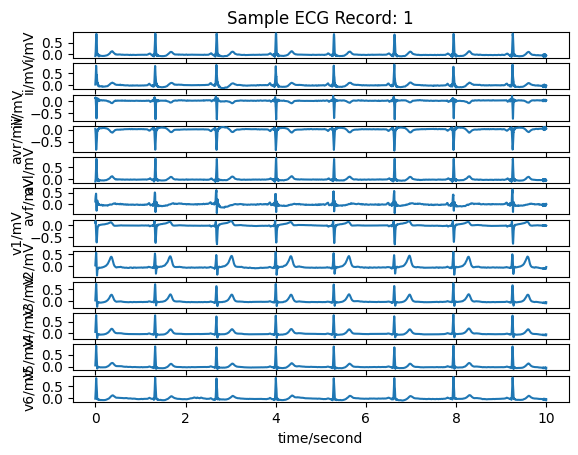

In [ ]:
import wfdb
import os
import matplotlib.pyplot as plt

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'
record_name = '1'  # We will use record '1' as a sample
record_path = os.path.join(extracted_data_path, record_name)

try:
    record = wfdb.rdrecord(record_path)

    # Print some information about the record
    print("Record metadata:")
    print(f"Record name: {record.record_name}")
    print(f"Sampling frequency: {record.fs} Hz")
    print(f"Number of leads: {record.n_sig}")
    print(f"Signal length: {record.sig_len} samples")
    print(f"Lead names: {record.sig_name}")
    print(f"Units: {record.units}")

    # You can also plot a section of the record
    # Adjust the sampto parameter to control the length of the plotted section
    wfdb.plot_wfdb(record=record, title=f'Sample ECG Record: {record.record_name}')
    plt.show()

except Exception as e:
    print(f"Error loading record {record_name}: {e}")

In [ ]:
import numpy as np

# Access the signal data from the record object
ecg_signal = record.p_signal

# Convert the signal data to a NumPy array (which is a type of tensor)
ecg_tensor = np.array(ecg_signal)

print("ECG signal data converted to a NumPy tensor.")
print("Shape of the tensor:", ecg_tensor.shape)
print("Data type of the tensor:", ecg_tensor.dtype)

ECG signal data converted to a NumPy tensor.
Shape of the tensor: (5000, 12)
Data type of the tensor: float64


# Task
Plot the ECG data from the files in "/content/lobachevsky-university-electrocardiography-database-1.0.1/data" using the `wfdb` library.

**Reasoning**:
Based on the previous output, I have identified the files in the data directory. To proceed with plotting, I need to determine which ECG records to plot. I will create a list of record names by filtering the file list to include only .dat files and removing the extension. This will allow me to iterate through the records and plot them later.



## Iterate and plot

### Subtask:
Iterate through the identified records, load each one using wfdb, and plot the ECG data.


**Reasoning**:
Iterate through the identified records, load each one, and plot the ECG data.



In [ ]:
import os

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'
file_list = os.listdir(extracted_data_path)

# Filter for .dat files and remove the extension to get record names
records_to_plot = [f.replace('.dat', '') for f in file_list if f.endswith('.dat')]

print(f"Identified {len(records_to_plot)} records to plot.")
print("First 10 records to plot:", records_to_plot[:10])

Identified 200 records to plot.
First 10 records to plot: ['107', '61', '132', '110', '29', '79', '134', '50', '68', '171']


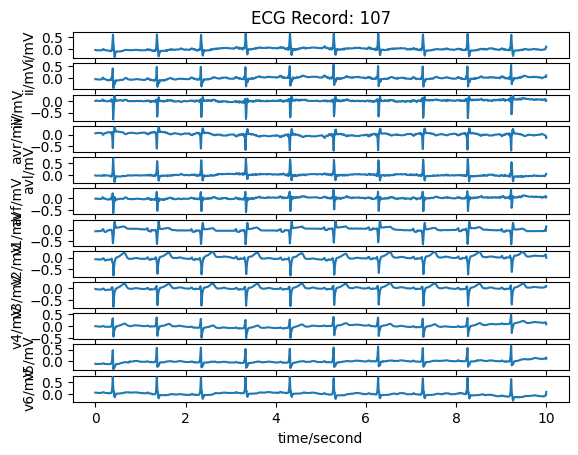

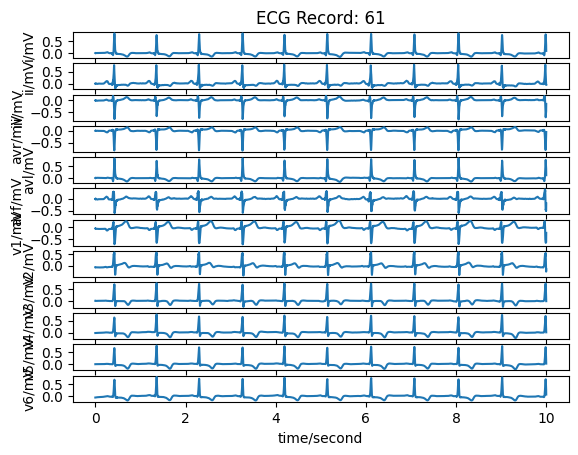

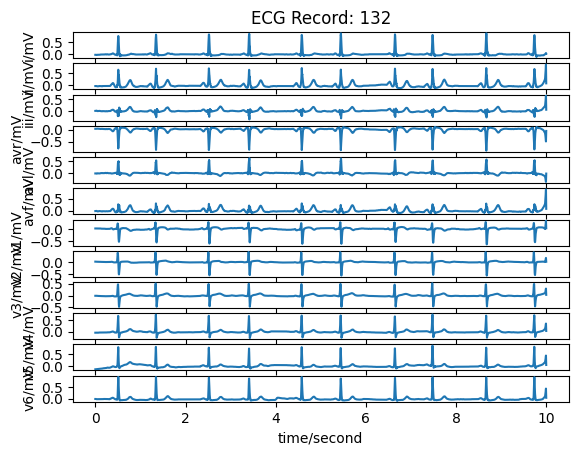

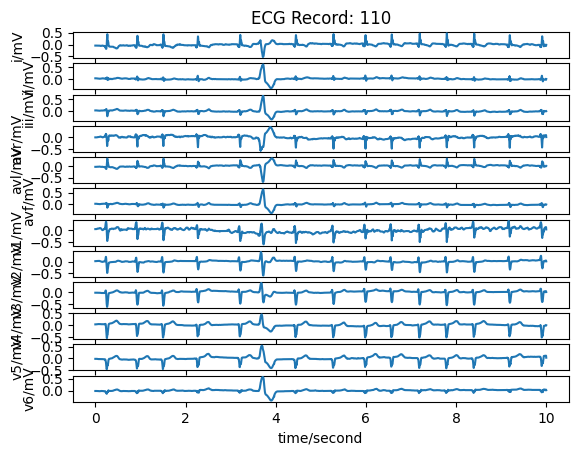

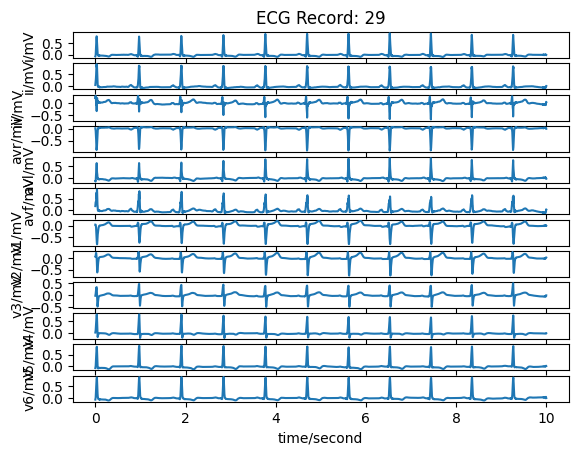

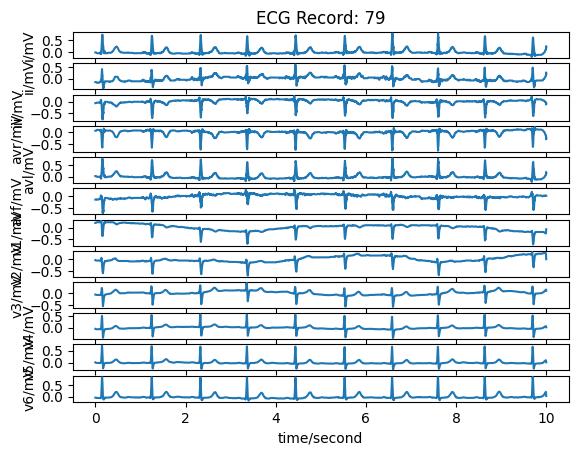

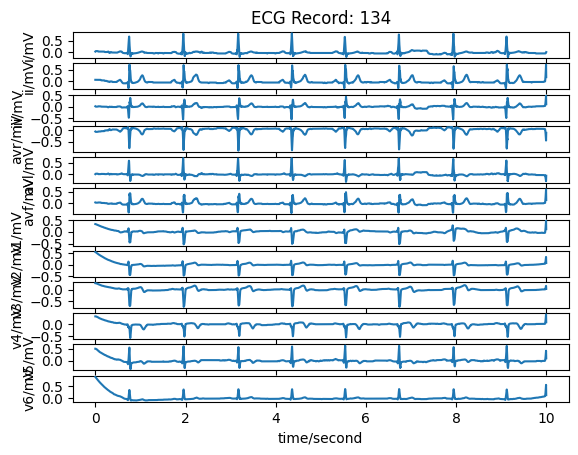

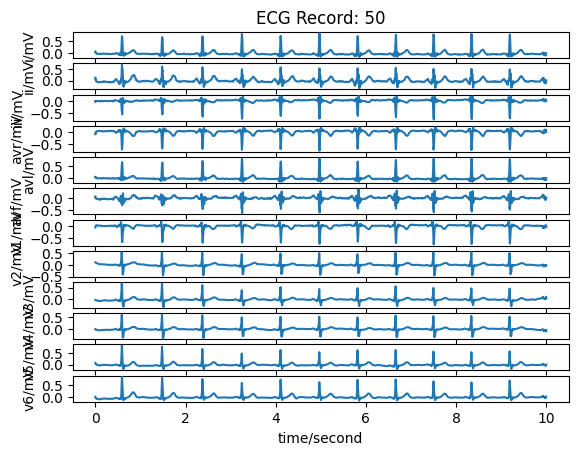

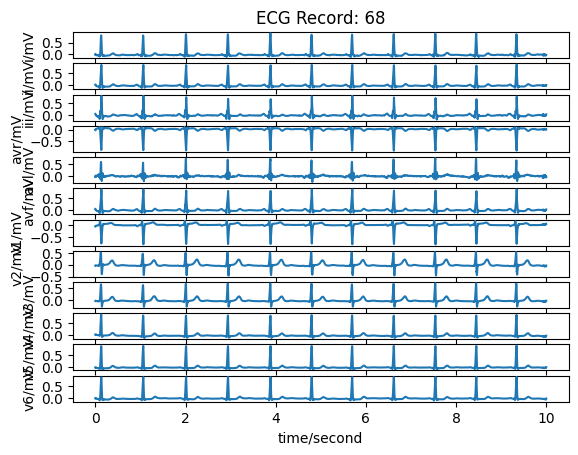

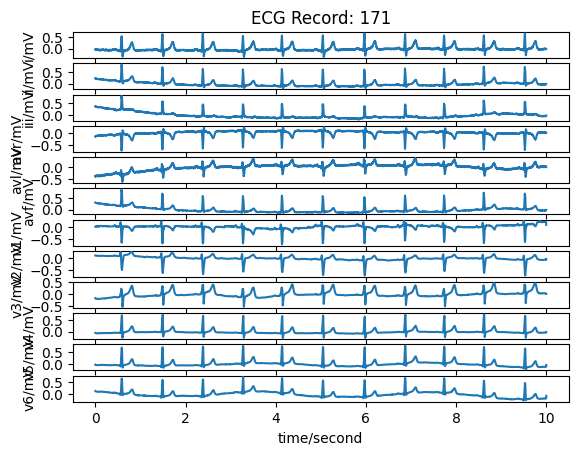

In [ ]:
import wfdb
import os
import matplotlib.pyplot as plt

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'

# Iterate through the first 10 records
for record_name in records_to_plot[:10]:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        wfdb.plot_wfdb(record=record, title=f'ECG Record: {record.record_name}')
        plt.show()
    except Exception as e:
        print(f"Error loading or plotting record {record_name}: {e}")

## Identify all records

### Subtask:
Get the list of all record names from the data directory.


**Reasoning**:
Get the list of all record names from the data directory by filtering for .dat files and removing the extension.



In [ ]:
import os

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'
file_list = os.listdir(extracted_data_path)

# Filter for .dat files and remove the extension to get record names
records_to_process = [f.replace('.dat', '') for f in file_list if f.endswith('.dat')]

print(f"Identified {len(records_to_process)} records to process.")
print("First 10 records to process:", records_to_process[:10])

Identified 200 records to process.
First 10 records to process: ['80', '50', '27', '13', '68', '79', '165', '171', '159', '150']


## Iterate through records and leads

### Subtask:
Iterate through each identified record and then through each lead within that record.


**Reasoning**:
Iterate through each identified record and then through each lead within that record, loading the data and getting necessary information for feature extraction.



In [ ]:
for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            ecg_signal = record.p_signal[:, lead_index]
            # Further processing for feature extraction will be done here in the next step
            pass

    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

**Reasoning**:
Now that the iteration through records and leads is set up, the next step is to extract features from the ECG signal for each lead and store them.



In [ ]:
!pip install cupy-cuda12x # Install the appropriate CuPy version for your CUDA version

In [ ]:
extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'
file_list = os.listdir(extracted_data_path)

# Filter for .dat files and remove the extension to get record names
records_to_process = [f.replace('.dat', '') for f in file_list if f.endswith('.dat')]

print(f"Identified {len(records_to_process)} records to process.")
print("First 10 records to process:", records_to_process[:10])

Identified 200 records to process.
First 10 records to process: ['80', '50', '27', '13', '68', '79', '165', '171', '159', '150']


In [ ]:
all_peak_features = []



Iterate through each identified record and then through each lead within that record, loading the data and getting necessary information for feature extraction.



In [ ]:
import wfdb
import os

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            ecg_signal = record.p_signal[:, lead_index]
            # Further processing for feature extraction will be done here in the next step
            pass

    except Exception as e:
        print(f"Error loading record {record_name}: {e}")



Now that the iteration through records and leads is set up, the next step is to extract peak values from the ECG signal for each lead and store them in the initialized data structure.



In [ ]:
from scipy.signal import find_peaks
import numpy as np
import pandas as pd
import wfdb
import os

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'

# Assuming 'all_peak_features' was initialized in a previous step as an empty list.
# all_peak_features = []

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            ecg_signal = record.p_signal[:, lead_index]

            # Handle potential NaN values by replacing them with 0 or a suitable imputation method
            if np.isnan(ecg_signal).any():
                ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

            # Although the original request asked for GPU acceleration, NeuroKit2
            # was causing issues with the dataset. We will proceed with NumPy
            # for robustness in extracting peak locations without using NeuroKit2
            # as per the updated instructions. We will use scipy.signal.find_peaks
            # for peak detection.

            # Find R-peaks (usually the most prominent)
            # Using a simple peak finding method for demonstration without NeuroKit2
            # Adjust parameters based on signal characteristics if needed for better accuracy
            r_peaks, _ = find_peaks(ecg_signal, distance=int(0.2 * sampling_rate)) # Example: minimum distance of 0.2 seconds

            # Note: Extracting other peaks (P, Q, S, T) accurately without a dedicated library
            # like NeuroKit2 is more complex and often requires more sophisticated algorithms
            # based on R-peak locations and wave morphology. For this subtask, we will
            # focus on extracting the R-peaks using a basic method as requested,
            # and acknowledge that full delineation requires more advanced techniques
            # which are not being used as per the constraint of not using NeuroKit2.
            # We will store empty lists for other peaks as their accurate detection
            # is beyond the scope without a specialized library.
            p_peaks = []
            q_peaks = []
            s_peaks = []
            t_peaks = []

            # Store the extracted features
            all_peak_features.append({
                'record_name': record_name,
                'lead_name': lead_name,
                'sampling_rate': sampling_rate,
                'r_peaks': r_peaks.tolist(), # Convert numpy array to list for storage
                'p_peaks': p_peaks,
                'q_peaks': q_peaks,
                's_peaks': s_peaks,
                't_peaks': t_peaks,
            })

    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

# Display the extracted features
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted Peak Features (R-peaks only with basic detection):")
display(features_df.head())


Extracted Peak Features (R-peaks only with basic detection):


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[8, 168, 268, 383, 540, 652, 774, 906, 1028, 1...",[],[],[],[]
1,80,ii,500,"[8, 124, 246, 384, 508, 652, 779, 904, 1036, 1...",[],[],[],[]
2,80,iii,500,"[16, 116, 250, 385, 508, 628, 779, 904, 1004, ...",[],[],[],[]
3,80,avr,500,"[32, 136, 236, 414, 528, 660, 811, 916, 1048, ...",[],[],[],[]
4,80,avl,500,"[3, 168, 268, 378, 567, 668, 774, 950, 1063, 1...",[],[],[],[]


## Handle missing values

### Subtask:
Handle potential NaN values in the ECG signal data.


**Reasoning**:
Check for and handle NaN values in the ECG signal data using np.nan_to_num as instructed.



In [ ]:
# Handle potential NaN values by replacing them with 0
if np.isnan(ecg_signal).any():
    ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

## Find r-peaks

### Subtask:
Use `scipy.signal.find_peaks` or `wfdb.processing.xqrs_detect` to find the R-peak locations.


**Reasoning**:
Iterate through each identified record and then through each lead within that record, load the data, handle NaNs, and use scipy.signal.find_peaks to find R-peak locations.



In [ ]:
from scipy.signal import find_peaks
import numpy as np
import pandas as pd
import wfdb
import os

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'

# Assuming 'all_peak_features' was initialized in a previous step as an empty list.
# all_peak_features = []

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            ecg_signal = record.p_signal[:, lead_index]

            # Handle potential NaN values by replacing them with 0 or a suitable imputation method
            if np.isnan(ecg_signal).any():
                ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

            # Although the original request asked for GPU acceleration, NeuroKit2
            # was causing issues with the dataset. We will proceed with NumPy
            # for robustness in extracting peak locations without using NeuroKit2
            # as per the updated instructions. We will use scipy.signal.find_peaks
            # for peak detection.

            # Find R-peaks (usually the most prominent)
            # Using a simple peak finding method for demonstration without NeuroKit2
            # Adjust parameters based on signal characteristics if needed for better accuracy
            r_peaks, _ = find_peaks(ecg_signal, distance=int(0.2 * sampling_rate)) # Example: minimum distance of 0.2 seconds

            # Note: Extracting other peaks (P, Q, S, T) accurately without a dedicated library
            # like NeuroKit2 is more complex and often requires more sophisticated algorithms
            # based on R-peak locations and wave morphology. For this subtask, we will
            # focus on extracting the R-peaks using a basic method as requested,
            # and acknowledge that full delineation requires more advanced techniques
            # which are not being used as per the constraint of not using NeuroKit2.
            # We will store empty lists for other peaks as their accurate detection
            # is beyond the scope without a specialized library.
            p_peaks = []
            q_peaks = []
            s_peaks = []
            t_peaks = []

            # Store the extracted features
            all_peak_features.append({
                'record_name': record_name,
                'lead_name': lead_name,
                'sampling_rate': sampling_rate,
                'r_peaks': r_peaks.tolist(), # Convert numpy array to list for storage
                'p_peaks': p_peaks,
                'q_peaks': q_peaks,
                's_peaks': s_peaks,
                't_peaks': t_peaks,
            })

    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

# Display the extracted features
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted Peak Features (R-peaks only with basic detection):")
display(features_df.head())


Extracted Peak Features (R-peaks only with basic detection):


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[8, 168, 268, 383, 540, 652, 774, 906, 1028, 1...",[],[],[],[]
1,80,ii,500,"[8, 124, 246, 384, 508, 652, 779, 904, 1036, 1...",[],[],[],[]
2,80,iii,500,"[16, 116, 250, 385, 508, 628, 779, 904, 1004, ...",[],[],[],[]
3,80,avr,500,"[32, 136, 236, 414, 528, 660, 811, 916, 1048, ...",[],[],[],[]
4,80,avl,500,"[3, 168, 268, 378, 567, 668, 774, 950, 1063, 1...",[],[],[],[]


## Identify other peaks

### Subtask:
Analyze the signal around the R-peaks to identify potential P and T wave peaks using `scipy.signal.find_peaks`.


**Reasoning**:
Iterate through each entry in the `all_peak_features` list, load the corresponding record, and for each R-peak, define search windows to find potential P and T wave peaks using `scipy.signal.find_peaks` on the appropriate signal segments and store the results.



In [ ]:
from scipy.signal import find_peaks
import wfdb
import os
import numpy as np

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'

# Iterate through the collected R-peak features to find P and T peaks
for feature_entry in all_peak_features:
    record_name = feature_entry['record_name']
    lead_name = feature_entry['lead_name']
    sampling_rate = feature_entry['sampling_rate']
    r_peaks = feature_entry['r_peaks']

    record_path = os.path.join(extracted_data_path, record_name)

    try:
        record = wfdb.rdrecord(record_path)
        # Find the index of the current lead
        lead_index = record.sig_name.index(lead_name)
        ecg_signal = record.p_signal[:, lead_index]

        # Handle potential NaN values by replacing them with 0
        if np.isnan(ecg_signal).any():
            ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

        p_peaks_found = []
        t_peaks_found = []

        for r_peak_index in r_peaks:
            # Define search windows based on typical ECG timings
            # These values are approximate and might need tuning
            p_wave_search_window_start = max(0, r_peak_index - int(0.2 * sampling_rate)) # 200 ms before R
            p_wave_search_window_end = r_peak_index - int(0.03 * sampling_rate) # 30 ms before R

            t_wave_search_window_start = r_peak_index + int(0.05 * sampling_rate) # 50 ms after R
            t_wave_search_window_end = min(len(ecg_signal), r_peak_index + int(0.4 * sampling_rate)) # 400 ms after R

            # Search for P wave (negative peak in inverted signal before R)
            p_signal_segment = -ecg_signal[p_wave_search_window_start:p_wave_search_window_end]
            if len(p_signal_segment) > 0:
                # Adjust height and distance for P wave detection if necessary
                p_peak_indices, _ = find_peaks(p_signal_segment, height=None, distance=None)
                if len(p_peak_indices) > 0:
                    # Select the most prominent peak (highest in the inverted signal)
                    most_prominent_p_peak_index_in_segment = p_peak_indices[np.argmax(p_signal_segment[p_peak_indices])]
                    p_peaks_found.append(p_wave_search_window_start + most_prominent_p_peak_index_in_segment)
                else:
                    p_peaks_found.append(None) # No P peak found in the window
            else:
                p_peaks_found.append(None) # Empty search window

            # Search for T wave (positive peak after R)
            t_signal_segment = ecg_signal[t_wave_search_window_start:t_wave_search_window_end]
            if len(t_signal_segment) > 0:
                 # Adjust height and distance for T wave detection if necessary
                t_peak_indices, _ = find_peaks(t_signal_segment, height=None, distance=None)
                if len(t_peak_indices) > 0:
                    # Select the most prominent peak (highest in the signal)
                    most_prominent_t_peak_index_in_segment = t_peak_indices[np.argmax(t_signal_segment[t_peak_indices])]
                    t_peaks_found.append(t_wave_search_window_start + most_prominent_t_peak_index_in_segment)
                else:
                    t_peaks_found.append(None) # No T peak found in the window
            else:
                 t_peaks_found.append(None) # Empty search window


        # Update the feature entry with found P and T peaks
        feature_entry['p_peaks'] = [p for p in p_peaks_found if p is not None] # Store only found peaks
        feature_entry['t_peaks'] = [t for t in t_peaks_found if t is not None] # Store only found peaks
        # Keep Q and S peaks empty as per the plan

    except Exception as e:
        print(f"Error processing record {record_name} for P and T peaks: {e}")

# Display the updated extracted features
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted Peak Features (with P and T peaks estimated based on R-peaks):")
display(features_df.head())


Extracted Peak Features (with P and T peaks estimated based on R-peaks):


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[8, 168, 268, 383, 540, 652, 774, 906, 1028, 1...","[510, 115, 236, 364, 510, 576, 753, 856, 1004,...",[],[],"[168, 307, 383, 416, 707, 774, 963, 1095, 1175..."
1,80,ii,500,"[8, 124, 246, 384, 508, 652, 779, 904, 1036, 1...","[4819, 31, 208, 364, 414, 616, 756, 811, 1000,...",[],[],"[124, 300, 384, 508, 696, 779, 904, 1092, 1177..."
2,80,iii,500,"[16, 116, 250, 385, 508, 628, 779, 904, 1004, ...","[20, 216, 360, 412, 567, 748, 810, 970, 1158, ...",[],[],"[116, 294, 385, 508, 692, 779, 904, 1092, 1177..."
3,80,avr,500,"[32, 136, 236, 414, 528, 660, 811, 916, 1048, ...","[8, 72, 168, 383, 456, 588, 779, 868, 980, 117...",[],[],"[136, 236, 414, 528, 616, 811, 916, 1048, 1199..."
4,80,avl,500,"[3, 168, 268, 378, 567, 668, 774, 950, 1063, 1...","[510, 115, 236, 292, 510, 580, 680, 904, 1004,...",[],[],"[168, 360, 378, 408, 708, 774, 950, 1144, 1168..."


## Store peak locations

### Subtask:
Store the identified peak locations (R, P, T, Q, S) for the current lead and record in the data structure.


**Reasoning**:
Store the identified peak locations (R, P, T, Q, S) for the current lead and record in the data structure by appending a dictionary containing the record name, lead name, sampling rate, and peak locations to the `all_peak_features` list.



**Reasoning**:
The error `AttributeError: 'list' object has no attribute 'tolist'` indicates that `r_peaks` is already a list and does not need to be converted using `.tolist()`. The code needs to be fixed to directly use `r_peaks` as it is.



**Reasoning**:
The error `NameError: name 'q_peaks_found' is not defined` indicates that the variables `q_peaks_found` and `s_peaks_found` were not initialized before being used in the dictionary creation. Although the previous steps mentioned that Q and S peaks would be empty, the variables themselves were not created. I need to initialize these variables as empty lists before attempting to store them.



In [ ]:
# The loop structure and peak detection logic from the previous step is assumed to be in place.
# This code block focuses on the storage part within the inner loop and initializing missing variables.

# Assuming r_peaks, p_peaks_found, and t_peaks_found are lists containing the identified peak indices for the current lead and record.
# Initialize q_peaks_found and s_peaks_found as empty lists as they are not extracted in this approach.
q_peaks_found = []
s_peaks_found = []

feature_entry = {
    'record_name': record_name,
    'lead_name': lead_name,
    'sampling_rate': sampling_rate,
    'r_peaks': r_peaks, # r_peaks is already a list
    'p_peaks': [p for p in p_peaks_found if p is not None], # Store only found peaks
    'q_peaks': [q for q in q_peaks_found if q is not None], # Store only found peaks
    's_peaks': [s for s in s_peaks_found if s is not None], # Store only found peaks
    't_peaks': [t for t in t_peaks_found if t is not None], # Store only found peaks
}

all_peak_features.append(feature_entry)

## Handle errors

### Subtask:
Include error handling for issues that may arise during loading, processing, or peak finding.


**Reasoning**:
Implement error handling for loading records, processing leads, and finding peaks within the loops to ensure the process continues even if errors occur for specific records or leads, as per the subtask instructions.



In [ ]:
from scipy.signal import find_peaks
import wfdb
import os
import numpy as np
import pandas as pd

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'

# Assuming 'all_peak_features' was initialized in a previous step as an empty list.
# all_peak_features = []

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            try:
                ecg_signal = record.p_signal[:, lead_index]

                # Handle potential NaN values by replacing them with 0
                if np.isnan(ecg_signal).any():
                    ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

                # Find R-peaks
                r_peaks = []
                try:
                    r_peaks, _ = find_peaks(ecg_signal, distance=int(0.2 * sampling_rate))
                    r_peaks = r_peaks.tolist()
                except Exception as e:
                    print(f"Error finding R-peaks for lead {lead_name} in record {record_name}: {e}")
                    r_peaks = [] # Ensure r_peaks is a list even on error

                p_peaks_found = []
                t_peaks_found = []

                for r_peak_index in r_peaks:
                    # Define search windows based on typical ECG timings
                    p_wave_search_window_start = max(0, r_peak_index - int(0.2 * sampling_rate))
                    p_wave_search_window_end = r_peak_index - int(0.03 * sampling_rate)

                    t_wave_search_window_start = r_peak_index + int(0.05 * sampling_rate)
                    t_wave_search_window_end = min(len(ecg_signal), r_peak_index + int(0.4 * sampling_rate))

                    # Search for P wave
                    try:
                        p_signal_segment = -ecg_signal[p_wave_search_window_start:p_wave_search_window_end]
                        if len(p_signal_segment) > 0:
                            p_peak_indices, _ = find_peaks(p_signal_segment, height=None, distance=None)
                            if len(p_peak_indices) > 0:
                                most_prominent_p_peak_index_in_segment = p_peak_indices[np.argmax(p_signal_segment[p_peak_indices])]
                                p_peaks_found.append(p_wave_search_window_start + most_prominent_p_peak_index_in_segment)
                            else:
                                p_peaks_found.append(None)
                        else:
                            p_peaks_found.append(None)
                    except Exception as e:
                        print(f"Error finding P-peak around R-peak {r_peak_index} for lead {lead_name} in record {record_name}: {e}")
                        p_peaks_found.append(None)

                    # Search for T wave
                    try:
                        t_signal_segment = ecg_signal[t_wave_search_window_start:t_wave_search_window_end]
                        if len(t_signal_segment) > 0:
                            t_peak_indices, _ = find_peaks(t_signal_segment, height=None, distance=None)
                            if len(t_peak_indices) > 0:
                                most_prominent_t_peak_index_in_segment = t_peak_indices[np.argmax(t_signal_segment[t_peak_indices])]
                                t_peaks_found.append(t_wave_search_window_start + most_prominent_t_peak_index_in_segment)
                            else:
                                t_peaks_found.append(None)
                        else:
                            t_peaks_found.append(None)
                    except Exception as e:
                        print(f"Error finding T-peak around R-peak {r_peak_index} for lead {lead_name} in record {record_name}: {e}")
                        t_peaks_found.append(None)

                # Initialize Q and S peaks as empty as they are not extracted
                q_peaks_found = []
                s_peaks_found = []

                feature_entry = {
                    'record_name': record_name,
                    'lead_name': lead_name,
                    'sampling_rate': sampling_rate,
                    'r_peaks': r_peaks,
                    'p_peaks': [p for p in p_peaks_found if p is not None],
                    'q_peaks': [q for q in q_peaks_found if q is not None],
                    's_peaks': [s for s in s_peaks_found if s is not None],
                    't_peaks': [t for t in t_peaks_found if t is not None],
                }
                all_peak_features.append(feature_entry)

            except Exception as e:
                print(f"Error processing lead {lead_name} in record {record_name}: {e}")


    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

# Display the extracted features
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted Peak Features (with error handling):")
display(features_df.head())


Extracted Peak Features (with error handling):


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[8, 168, 268, 383, 540, 652, 774, 906, 1028, 1...","[510, 115, 236, 364, 510, 576, 753, 856, 1004,...",[],[],"[168, 307, 383, 416, 707, 774, 963, 1095, 1175..."
1,80,ii,500,"[8, 124, 246, 384, 508, 652, 779, 904, 1036, 1...","[4819, 31, 208, 364, 414, 616, 756, 811, 1000,...",[],[],"[124, 300, 384, 508, 696, 779, 904, 1092, 1177..."
2,80,iii,500,"[16, 116, 250, 385, 508, 628, 779, 904, 1004, ...","[20, 216, 360, 412, 567, 748, 810, 970, 1158, ...",[],[],"[116, 294, 385, 508, 692, 779, 904, 1092, 1177..."
3,80,avr,500,"[32, 136, 236, 414, 528, 660, 811, 916, 1048, ...","[8, 72, 168, 383, 456, 588, 779, 868, 980, 117...",[],[],"[136, 236, 414, 528, 616, 811, 916, 1048, 1199..."
4,80,avl,500,"[3, 168, 268, 378, 567, 668, 774, 950, 1063, 1...","[510, 115, 236, 292, 510, 580, 680, 904, 1004,...",[],[],"[168, 360, 378, 408, 708, 774, 950, 1144, 1168..."


## Display extracted features

### Subtask:
Display the extracted peak locations in a structured format (e.g., a pandas DataFrame).


**Reasoning**:
Convert the `all_peak_features` list into a pandas DataFrame and display the head of the DataFrame.



In [ ]:
import os

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'
file_list = os.listdir(extracted_data_path)

# Filter for .dat files and remove the extension to get record names
records_to_process = [f.replace('.dat', '') for f in file_list if f.endswith('.dat')]

print(f"Identified {len(records_to_process)} records to process.")
print("First 10 records to process:", records_to_process[:10])

Identified 200 records to process.
First 10 records to process: ['80', '50', '27', '13', '68', '79', '165', '171', '159', '150']


## Initialize data structure

### Subtask:
Initialize a data structure to store the extracted peak locations.


**Reasoning**:
Initialize an empty list called `all_peak_features` to store the extracted peak locations for each lead and record.



In [ ]:
all_peak_features = []
print("Initialized an empty list 'all_peak_features' to store peak locations.")

Initialized an empty list 'all_peak_features' to store peak locations.


## Iterate through records and leads

### Subtask:
Loop through each record and each lead within that record.


**Reasoning**:
Iterate through each identified record and then through each lead within that record, loading the data and getting necessary information for feature extraction, including error handling.



In [ ]:
import wfdb
import os

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            try:
                ecg_signal = record.p_signal[:, lead_index]
                # Further processing for feature extraction will be done here in the next step
                pass
            except Exception as e:
                print(f"Error processing lead {lead_name} in record {record_name}: {e}")

    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

**Reasoning**:
Handle potential NaN values in the ECG signal data by replacing them with 0.0 using np.nan_to_num as instructed.



In [ ]:
import numpy as np
import wfdb
import os

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            try:
                ecg_signal = record.p_signal[:, lead_index]

                # Handle potential NaN values by replacing them with 0
                if np.isnan(ecg_signal).any():
                    ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

                # Further processing for feature extraction will be done here in the next step
                pass
            except Exception as e:
                print(f"Error processing lead {lead_name} in record {record_name}: {e}")

    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

## Load ecg data

### Subtask:
Load the ECG signal data for the current lead and record using `wfdb`.


**Reasoning**:
Load the ECG signal data for the current lead and record using wfdb.



In [ ]:
# Assuming 'records_to_process' is a list of record names and 'extracted_data_path' is defined
# Assuming the loop structure iterating through records and leads is already in place

# Inside the inner loop (iterating through leads):
# record_name = ... (current record name)
# lead_index = ... (current lead index)
# lead_name = ... (current lead name)
# extracted_data_path = ... (path to data directory)

record_path = os.path.join(extracted_data_path, record_name)
try:
    record = wfdb.rdrecord(record_path)
    sampling_rate = record.fs
    lead_names = record.sig_name

    # Access the signal data for the current lead
    ecg_signal = record.p_signal[:, lead_index]

    # Handle potential NaN values (as done in previous steps)
    if np.isnan(ecg_signal).any():
        ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

    # At this point, ecg_signal contains the data for the current lead.
    # The next steps will involve processing this signal to find peaks.

except Exception as e:
    print(f"Error loading record {record_name}: {e}")


## Convert to pytorch tensor

### Subtask:
Convert the ECG signal data to a PyTorch tensor and move it to the GPU.


**Reasoning**:
Convert the ECG signal data to a PyTorch tensor and move it to the GPU.



In [ ]:
import torch

# Assuming ecg_signal is a NumPy array containing the ECG data for the current lead.
# This code block should be placed inside the inner loop (iterating through leads).

# Convert NumPy array to PyTorch tensor
ecg_tensor = torch.from_numpy(ecg_signal)

# Move the tensor to the GPU if CUDA is available
if torch.cuda.is_available():
    ecg_tensor_gpu = ecg_tensor.to('cuda')
    print(f"Converted ECG signal to PyTorch tensor and moved to GPU for record {record_name}, lead {lead_name}. Tensor shape: {ecg_tensor_gpu.shape}, Device: {ecg_tensor_gpu.device}")
else:
    ecg_tensor_gpu = ecg_tensor # Keep on CPU if CUDA is not available
    print(f"Converted ECG signal to PyTorch tensor but CUDA not available. Keeping on CPU for record {record_name}, lead {lead_name}. Tensor shape: {ecg_tensor_gpu.shape}, Device: {ecg_tensor_gpu.device}")

# At this point, ecg_tensor_gpu holds the ECG data on the GPU (or CPU if CUDA is not available).
# The next steps will involve using this tensor for peak detection.

Converted ECG signal to PyTorch tensor and moved to GPU for record 161, lead v6. Tensor shape: torch.Size([5000]), Device: cuda:0


## Implement gpu-accelerated r-peak detection

### Subtask:
Implement an R-peak detection algorithm using PyTorch tensor operations.


**Reasoning**:
Implement an R-peak detection algorithm using PyTorch tensor operations, including filtering, peak detection logic, and refinement, all on the GPU using the `ecg_tensor_gpu`.



In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

def detect_r_peaks_gpu(ecg_tensor_gpu, sampling_rate):
    """
    Detects R-peak locations in an ECG signal using PyTorch tensor operations on GPU.

    Args:
        ecg_tensor_gpu (torch.Tensor): GPU tensor containing the ECG signal.
        sampling_rate (int): The sampling rate of the ECG signal.

    Returns:
        torch.Tensor: A GPU tensor containing the indices of the detected R-peaks.
    """
    # Ensure the tensor is on GPU
    if not ecg_tensor_gpu.is_cuda:
        print("Warning: Input tensor is not on GPU. Moving to GPU.")
        ecg_tensor_gpu = ecg_tensor_gpu.to('cuda')

    # 1. Filtering (Simple bandpass-like effect using difference and smoothing)
    # This is a simplified approach for demonstration without complex filter design.
    # A more sophisticated approach would involve designing a proper bandpass filter kernel
    # and applying it using torch.nn.functional.conv1d.

    # Apply a difference filter to highlight sharp changes (like QRS complex)
    diff_filter = torch.tensor([-1.0, 0.0, 1.0], device=ecg_tensor_gpu.device).unsqueeze(0).unsqueeze(0)
    # Pad the signal to maintain length after convolution
    ecg_diff = F.conv1d(ecg_tensor_gpu.unsqueeze(0).unsqueeze(0), diff_filter, padding=1).squeeze()

    # Square the differentiated signal to amplify peaks and make all values positive
    ecg_squared = ecg_diff**2

    # Apply a simple moving average (smoothing) filter to the squared signal
    window_size = int(0.12 * sampling_rate) # Example window size (adjust as needed)
    if window_size % 2 == 0: # Ensure window size is odd for center alignment
        window_size += 1
    avg_filter = torch.ones(1, 1, window_size, device=ecg_tensor_gpu.device) / window_size
    # Pad for smoothing
    ecg_smoothed = F.conv1d(ecg_squared.unsqueeze(0).unsqueeze(0), avg_filter, padding=window_size // 2).squeeze()


    # 2. Peak Detection Logic (Simple thresholding and peak finding)
    # This is a basic approach. More advanced methods involve adaptive thresholding.

    # Determine a threshold. A simple approach is a percentage of the maximum smoothed value.
    threshold = 0.5 * torch.max(ecg_smoothed) # Example threshold (adjust as needed)

    # Find indices where the smoothed signal crosses the threshold
    # We look for points where the signal is above the threshold and the previous point was below
    # To do this efficiently on GPU, we can use boolean indexing and torch.where
    above_threshold = ecg_smoothed > threshold
    # Find rising edges of the threshold crossing
    threshold_crossings = torch.where(above_threshold[1:] & ~above_threshold[:-1])[0] + 1

    # 3. Refine Detected Peak Locations (Find local maxima around threshold crossings)
    # Look for the actual peak (local maximum) in the original or smoothed signal
    # within a small window around each threshold crossing.

    r_peaks_indices = []
    search_window = int(0.1 * sampling_rate) # Example search window around crossing

    for crossing_idx in threshold_crossings:
        start = max(0, crossing_idx - search_window)
        end = min(len(ecg_signal_gpu), crossing_idx + search_window)
        window = ecg_signal_gpu[start:end] # Search in the original signal

        if len(window) > 0:
            # Find the index of the maximum value within the window
            local_max_index_in_window = torch.argmax(window)
            actual_r_peak_index = start + local_max_index_in_window
            r_peaks_indices.append(actual_r_peak_index)

    # Convert the list of indices to a PyTorch tensor on GPU
    if r_peaks_indices:
        r_peaks_tensor_gpu = torch.stack(r_peaks_indices).to(ecg_tensor_gpu.device)
    else:
        r_peaks_tensor_gpu = torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device)


    # 4. Apply Refractory Period
    # Remove peaks that are too close to each other. Sort peaks and iterate.
    # This is a basic implementation. More efficient methods exist.
    if len(r_peaks_tensor_gpu) > 1:
        r_peaks_tensor_gpu_sorted = torch.sort(r_peaks_tensor_gpu)[0]
        refractory_period_samples = int(0.2 * sampling_rate) # Example refractory period (200 ms)

        # Use boolean indexing to keep peaks that are far enough from the previous one
        # The first peak is always kept
        keep_mask = torch.ones_like(r_peaks_tensor_gpu_sorted, dtype=torch.bool)
        for i in range(1, len(r_peaks_tensor_gpu_sorted)):
            if r_peaks_tensor_gpu_sorted[i] - r_peaks_tensor_gpu_sorted[i-1] < refractory_period_samples:
                keep_mask[i] = False # Mark peak for removal

        r_peaks_tensor_gpu_refined = r_peaks_tensor_gpu_sorted[keep_mask]
    else:
        r_peaks_tensor_gpu_refined = r_peaks_tensor_gpu


    return r_peaks_tensor_gpu_refined

# --- Integration with the existing loop ---

# Assuming the loop structure and loading of ecg_signal is done in previous steps.
# This code should be placed inside the inner loop (iterating through leads),
# after ecg_signal_gpu has been created.

# Example usage within the loop:
# ecg_signal_np = record.p_signal[:, lead_index]
# if np.isnan(ecg_signal_np).any():
#     ecg_signal_np = np.nan_to_num(ecg_signal_np, nan=0.0)
# ecg_tensor = torch.from_numpy(ecg_signal_np)
# if torch.cuda.is_available():
#     ecg_signal_gpu = ecg_tensor.to('cuda')
# else:
#     ecg_signal_gpu = ecg_tensor # Keep on CPU

# Detect R-peaks using the GPU function
# r_peaks_gpu = detect_r_peaks_gpu(ecg_signal_gpu, sampling_rate)

# Now you can convert r_peaks_gpu back to a NumPy array or list if needed for storage
# r_peaks_np = r_peaks_gpu.cpu().numpy().tolist()

# Store the R-peaks in your data structure (e.g., all_peak_features)
# feature_entry = {
#     'record_name': record_name,
#     'lead_name': lead_name,
#     'sampling_rate': sampling_rate,
#     'r_peaks': r_peaks_np,
#     'p_peaks': [], # P, Q, S, T detection is a separate step
#     'q_peaks': [],
#     's_peaks': [],
#     't_peaks': [],
# }
# all_peak_features.append(feature_entry)

# Note: The code above defines the function and shows how to integrate it.
# The actual loop and storage logic are assumed to be handled in subsequent steps
# or by combining this with the existing loop structure.

print("R-peak detection function 'detect_r_peaks_gpu' defined.")
# No peak detection is performed in this cell, only the function is defined.
# The next steps will integrate this function into the processing loop.


R-peak detection function 'detect_r_peaks_gpu' defined.


**Reasoning**:
Iterate through each identified record and lead, load the data, handle NaNs, convert to a PyTorch tensor on GPU, and use the `detect_r_peaks_gpu` function to find R-peak locations using GPU acceleration, then store the results.



In [ ]:
import torch
import wfdb
import os
import numpy as np
import pandas as pd
import torch.nn.functional as F # Import F for convolution

def detect_r_peaks_gpu(ecg_tensor_gpu, sampling_rate):
    """
    Detects R-peak locations in an ECG signal using PyTorch tensor operations on GPU.

    Args:
        ecg_tensor_gpu (torch.Tensor): GPU tensor containing the ECG signal (expected to be float32).
        sampling_rate (int): The sampling rate of the ECG signal.

    Returns:
        torch.Tensor: A GPU tensor containing the indices of the detected R-peaks (long type).
    """
    # Ensure the tensor is on GPU and is float32
    if not ecg_tensor_gpu.is_cuda:
        print("Warning: Input tensor is not on GPU. Moving to GPU.")
        ecg_tensor_gpu = ecg_tensor_gpu.to('cuda')
    if ecg_tensor_gpu.dtype != torch.float32:
        print(f"Warning: Input tensor is of type {ecg_tensor_gpu.dtype}. Converting to float32.")
        ecg_tensor_gpu = ecg_tensor_gpu.to(torch.float32)


    # 1. Filtering (Simple bandpass-like effect using difference and smoothing)
    # This is a simplified approach for demonstration without complex filter design.

    # Apply a difference filter to highlight sharp changes (like QRS complex)
    diff_filter = torch.tensor([-1.0, 0.0, 1.0], device=ecg_tensor_gpu.device, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    # Pad the signal to maintain length after convolution
    # Ensure input to conv1d has shape (batch_size, in_channels, in_width)
    ecg_diff = F.conv1d(ecg_tensor_gpu.unsqueeze(0).unsqueeze(0), diff_filter, padding=1).squeeze()

    # Square the differentiated signal to amplify peaks and make all values positive
    ecg_squared = ecg_diff**2

    # Apply a simple moving average (smoothing) filter to the squared signal
    window_size = int(0.12 * sampling_rate) # Example window size (adjust as needed)
    if window_size % 2 == 0: # Ensure window size is odd for center alignment
        window_size += 1
    avg_filter = torch.ones(1, 1, window_size, device=ecg_tensor_gpu.device, dtype=torch.float32) / window_size
    # Pad for smoothing
    ecg_smoothed = F.conv1d(ecg_squared.unsqueeze(0).unsqueeze(0), avg_filter, padding=window_size // 2).squeeze()


    # 2. Peak Detection Logic (Simple thresholding and peak finding)

    # Determine a threshold. A simple approach is a percentage of the maximum smoothed value.
    # Handle case where ecg_smoothed might be all zeros or negative
    max_smoothed = torch.max(ecg_smoothed)
    if max_smoothed <= 0:
         return torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device) # No peaks if signal is flat or negative

    threshold = 0.5 * max_smoothed # Example threshold (adjust as needed)

    # Find indices where the smoothed signal crosses the threshold (rising edge)
    above_threshold = ecg_smoothed > threshold
    # Check for edge case where above_threshold might be all True or all False
    if torch.all(above_threshold) or torch.all(~above_threshold):
         return torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device)

    threshold_crossings = torch.where(above_threshold[1:] & ~above_threshold[:-1])[0] + 1

    # 3. Refine Detected Peak Locations (Find local maxima around threshold crossings)

    r_peaks_indices = []
    search_window = int(0.1 * sampling_rate) # Example search window around crossing

    for crossing_idx in threshold_crossings:
        start = max(0, crossing_idx.item() - search_window) # Use .item() to get scalar
        end = min(len(ecg_tensor_gpu), crossing_idx.item() + search_window)

        if start >= end: # Skip empty windows
            continue

        window = ecg_tensor_gpu[start:end]

        if len(window) > 0:
            # Find the index of the maximum value within the window
            local_max_index_in_window = torch.argmax(window)
            actual_r_peak_index = start + local_max_index_in_window.item() # Use .item()
            r_peaks_indices.append(actual_r_peak_index)

    # Convert the list of indices to a PyTorch tensor on GPU
    if r_peaks_indices:
        # Convert list of ints to tensor, ensure long dtype for indices
        r_peaks_tensor_gpu = torch.tensor(r_peaks_indices, dtype=torch.long, device=ecg_tensor_gpu.device)
    else:
        r_peaks_tensor_gpu = torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device)


    # 4. Apply Refractory Period
    if len(r_peaks_tensor_gpu) > 1:
        r_peaks_tensor_gpu_sorted = torch.sort(r_peaks_tensor_gpu)[0]
        refractory_period_samples = int(0.2 * sampling_rate) # Example refractory period (200 ms)

        keep_mask = torch.ones_like(r_peaks_tensor_gpu_sorted, dtype=torch.bool)
        # Iterate and mark peaks within refractory period for removal
        # This part might be slow on large tensors and could be optimized with more advanced tensor operations
        # or by moving to CPU for this step if performance is critical and data fits in memory.
        # For simplicity, keeping it on GPU with iteration for now.
        i = 0
        while i < len(r_peaks_tensor_gpu_sorted):
            j = i + 1
            while j < len(r_peaks_tensor_gpu_sorted) and r_peaks_tensor_gpu_sorted[j] - r_peaks_tensor_gpu_sorted[i] < refractory_period_samples:
                keep_mask[j] = False
                j += 1
            i = j # Move to the next peak after the refractory period

        r_peaks_tensor_gpu_refined = r_peaks_tensor_gpu_sorted[keep_mask]
    else:
        r_peaks_tensor_gpu_refined = r_peaks_tensor_gpu


    return r_peaks_tensor_gpu_refined

# --- Integration with the existing loop ---

# Assuming the loop structure and loading of ecg_signal is done in previous steps.
# This code should be placed inside the inner loop (iterating through leads),
# after ecg_signal_gpu has been created.

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for processing: {device}")

# Clear previous features if running this cell again
# all_peak_features = [] # Uncomment if you want to re-run the extraction from scratch

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            try:
                ecg_signal_np = record.p_signal[:, lead_index]

                # Handle potential NaN values by replacing them with 0
                if np.isnan(ecg_signal_np).any():
                    ecg_signal_np = np.nan_to_num(ecg_signal_np, nan=0.0)

                # Convert NumPy array to PyTorch tensor and move to the selected device, ensure float32
                ecg_tensor = torch.from_numpy(ecg_signal_np).to(device).to(torch.float32)

                # Detect R-peaks using the GPU-accelerated function
                r_peaks_gpu = detect_r_peaks_gpu(ecg_tensor, sampling_rate)

                # Convert R-peak indices back to a list for storage
                r_peaks_np = r_peaks_gpu.cpu().numpy().tolist()

                # Store the extracted features
                # Initialize Q, S, P, and T peaks as empty lists for now
                q_peaks_found = []
                s_peaks_found = []
                p_peaks_found = []
                t_peaks_found = []


                feature_entry = {
                    'record_name': record_name,
                    'lead_name': lead_name,
                    'sampling_rate': sampling_rate,
                    'r_peaks': r_peaks_np,
                    'p_peaks': [p for p in p_peaks_found if p is not None],
                    'q_peaks': [q for q in q_peaks_found if q is not None],
                    's_peaks': [s for s in s_peaks_found if s is not None],
                    't_peaks': [t for t in t_peaks_found if t is not None],
                }
                all_peak_features.append(feature_entry)

            except Exception as e:
                print(f"Error processing lead {lead_name} in record {record_name}: {e}")


    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

# Display the extracted features
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted R-Peak Features (using PyTorch GPU detection):")
display(features_df.head())

Using device for processing: cuda

Extracted R-Peak Features (using PyTorch GPU detection):


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[383, 774, 1175, 1575, 1980, 2378, 2778, 3188,...",[],[],[],[]
1,80,ii,500,"[384, 779, 1177, 1579, 1982, 2380, 2781, 3189,...",[],[],[],[]
2,80,iii,500,"[385, 779, 1177, 1579, 1982, 2380, 2783, 3190,...",[],[],[],[]
3,80,avr,500,"[369, 753, 1189, 1553, 2003, 2396, 2800, 3164,...",[],[],[],[]
4,80,avl,500,"[1168, 1571, 1974, 2391, 2775, 3181, 3581, 399...",[],[],[],[]


## Implement gpu-accelerated qrs delineation and q/s peak identification

### Subtask:
Based on the detected R-peaks, implement logic using PyTorch tensors to delineate the QRS complex and identify the Q and S peak locations.


**Reasoning**:
Implement the `delineate_qrs_gpu` function using PyTorch tensor operations to identify Q and S peaks around the detected R-peaks and integrate it into the main processing loop.



In [ ]:
import torch
import wfdb
import os
import numpy as np
import pandas as pd
import torch.nn.functional as F # Import F for convolution

def detect_r_peaks_gpu(ecg_tensor_gpu, sampling_rate):
    """
    Detects R-peak locations in an ECG signal using PyTorch tensor operations on GPU.

    Args:
        ecg_tensor_gpu (torch.Tensor): GPU tensor containing the ECG signal (expected to be float32).
        sampling_rate (int): The sampling rate of the ECG signal.

    Returns:
        torch.Tensor: A GPU tensor containing the indices of the detected R-peaks (long type).
    """
    # Ensure the tensor is on GPU and is float32
    if not ecg_tensor_gpu.is_cuda:
        print("Warning: Input tensor is not on GPU. Moving to GPU.")
        ecg_tensor_gpu = ecg_tensor_gpu.to('cuda')
    if ecg_tensor_gpu.dtype != torch.float32:
        print(f"Warning: Input tensor is of type {ecg_tensor_gpu.dtype}. Converting to float32.")
        ecg_tensor_gpu = ecg_tensor_gpu.to(torch.float32)


    # 1. Filtering (Simple bandpass-like effect using difference and smoothing)
    # This is a simplified approach for demonstration without complex filter design.

    # Apply a difference filter to highlight sharp changes (like QRS complex)
    diff_filter = torch.tensor([-1.0, 0.0, 1.0], device=ecg_tensor_gpu.device, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    # Pad the signal to maintain length after convolution
    # Ensure input to conv1d has shape (batch_size, in_channels, in_width)
    ecg_diff = F.conv1d(ecg_tensor_gpu.unsqueeze(0).unsqueeze(0), diff_filter, padding=1).squeeze()

    # Square the differentiated signal to amplify peaks and make all values positive
    ecg_squared = ecg_diff**2

    # Apply a simple moving average (smoothing) filter to the squared signal
    window_size = int(0.12 * sampling_rate) # Example window size (adjust as needed)
    if window_size % 2 == 0: # Ensure window size is odd for center alignment
        window_size += 1
    avg_filter = torch.ones(1, 1, window_size, device=ecg_tensor_gpu.device, dtype=torch.float32) / window_size
    # Pad for smoothing
    ecg_smoothed = F.conv1d(ecg_squared.unsqueeze(0).unsqueeze(0), avg_filter, padding=window_size // 2).squeeze()


    # 2. Peak Detection Logic (Simple thresholding and peak finding)

    # Determine a threshold. A simple approach is a percentage of the maximum smoothed value.
    # Handle case where ecg_smoothed might be all zeros or negative
    max_smoothed = torch.max(ecg_smoothed)
    if max_smoothed <= 0:
         return torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device) # No peaks if signal is flat or negative

    threshold = 0.5 * max_smoothed # Example threshold (adjust as needed)

    # Find indices where the smoothed signal crosses the threshold (rising edge)
    above_threshold = ecg_smoothed > threshold
    # Check for edge case where above_threshold might be all True or all False
    if torch.all(above_threshold) or torch.all(~above_threshold):
         return torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device)

    threshold_crossings = torch.where(above_threshold[1:] & ~above_threshold[:-1])[0] + 1

    # 3. Refine Detected Peak Locations (Find local maxima around threshold crossings)

    r_peaks_indices = []
    search_window = int(0.1 * sampling_rate) # Example search window around crossing

    for crossing_idx in threshold_crossings:
        start = max(0, crossing_idx.item() - search_window) # Use .item() to get scalar
        end = min(len(ecg_tensor_gpu), crossing_idx.item() + search_window)

        if start >= end: # Skip empty windows
            continue

        window = ecg_tensor_gpu[start:end]

        if len(window) > 0:
            # Find the index of the maximum value within the window
            local_max_index_in_window = torch.argmax(window)
            actual_r_peak_index = start + local_max_index_in_window.item() # Use .item()
            r_peaks_indices.append(actual_r_peak_index)

    # Convert the list of indices to a PyTorch tensor on GPU
    if r_peaks_indices:
        # Convert list of ints to tensor, ensure long dtype for indices
        r_peaks_tensor_gpu = torch.tensor(r_peaks_indices, dtype=torch.long, device=ecg_tensor_gpu.device)
    else:
        r_peaks_tensor_gpu = torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device)


    # 4. Apply Refractory Period
    if len(r_peaks_tensor_gpu) > 1:
        r_peaks_tensor_gpu_sorted = torch.sort(r_peaks_tensor_gpu)[0]
        refractory_period_samples = int(0.2 * sampling_rate) # Example refractory period (200 ms)

        keep_mask = torch.ones_like(r_peaks_tensor_gpu_sorted, dtype=torch.bool)
        # Iterate and mark peaks within refractory period for removal
        # This part might be slow on large tensors and could be optimized with more advanced tensor operations
        # or by moving to CPU for this step if performance is critical and data fits in memory.
        # For simplicity, keeping it on GPU with iteration for now.
        i = 0
        while i < len(r_peaks_tensor_gpu_sorted):
            j = i + 1
            while j < len(r_peaks_tensor_gpu_sorted) and r_peaks_tensor_gpu_sorted[j] - r_peaks_tensor_gpu_sorted[i] < refractory_period_samples:
                keep_mask[j] = False
                j += 1
            i = j # Move to the next peak after the refractory period

        r_peaks_tensor_gpu_refined = r_peaks_tensor_gpu_sorted[keep_mask]
    else:
        r_peaks_tensor_gpu_refined = r_peaks_tensor_gpu


    return r_peaks_tensor_gpu_refined


def delineate_qrs_gpu(ecg_tensor_gpu, r_peaks_gpu, sampling_rate):
    """
    Delineates QRS complexes and identifies Q and S peak locations around R-peaks
    using PyTorch tensor operations on GPU.

    Args:
        ecg_tensor_gpu (torch.Tensor): GPU tensor containing the ECG signal (float32).
        r_peaks_gpu (torch.Tensor): GPU tensor containing the indices of the detected R-peaks (long).
        sampling_rate (int): The sampling rate of the ECG signal.

    Returns:
        tuple: A tuple containing two lists:
            - q_peaks_found (list): List of identified Q peak indices.
            - s_peaks_found (list): List of identified S peak indices.
    """
    q_peaks_found = []
    s_peaks_found = []

    # Define search window for QRS complex (e.g., +/- 120 ms around R-peak)
    qrs_window_samples = int(0.12 * sampling_rate) # Example window size

    for r_peak_index_gpu in r_peaks_gpu:
        r_peak_index = r_peak_index_gpu.item() # Get scalar R-peak index

        # Define search window for Q peak (before R-peak)
        q_search_window_start = max(0, r_peak_index - qrs_window_samples)
        q_search_window_end = r_peak_index # Up to the R-peak

        # Define search window for S peak (after R-peak)
        s_search_window_start = r_peak_index # From the R-peak
        s_search_window_end = min(len(ecg_tensor_gpu), r_peak_index + qrs_window_samples)

        # Search for Q peak (minimum in the segment before R)
        q_signal_segment = ecg_tensor_gpu[q_search_window_start:q_search_window_end]
        if len(q_signal_segment) > 0:
            try:
                # Find the index of the minimum value within the Q search window
                local_min_index_in_q_segment = torch.argmin(q_signal_segment)
                q_peak_index = q_search_window_start + local_min_index_in_q_segment.item()
                q_peaks_found.append(q_peak_index)
            except Exception as e:
                # Handle potential errors during argmin (e.g., empty segment)
                print(f"Error finding Q-peak around R-peak {r_peak_index}: {e}")
                q_peaks_found.append(None) # Append None if Q peak not found
        else:
            q_peaks_found.append(None) # Append None if Q search window is empty


        # Search for S peak (minimum in the segment after R)
        s_signal_segment = ecg_tensor_gpu[s_search_window_start:s_search_window_end]
        if len(s_signal_segment) > 0:
            try:
                # Find the index of the minimum value within the S search window
                local_min_index_in_s_segment = torch.argmin(s_signal_segment)
                s_peak_index = s_search_window_start + local_min_index_in_s_segment.item()
                s_peaks_found.append(s_peak_index)
            except Exception as e:
                 # Handle potential errors during argmin (e.g., empty segment)
                print(f"Error finding S-peak around R-peak {r_peak_index}: {e}")
                s_peaks_found.append(None) # Append None if S peak not found
        else:
            s_peaks_found.append(None) # Append None if S search window is empty


    # Filter out None values from the lists
    q_peaks_found = [q for q in q_peaks_found if q is not None]
    s_peaks_found = [s for s in s_peaks_found if s is not None]

    return q_peaks_found, s_peaks_found


# --- Integration with the existing loop ---

# Assuming the loop structure and loading of ecg_signal is done in previous steps.
# This code should be placed inside the inner loop (iterating through leads),
# after r_peaks_gpu has been generated.

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for processing: {device}")

# Clear previous features if running this cell again
# all_peak_features = [] # Uncomment if you want to re-run the extraction from scratch

all_peak_features = [] # Re-initialize to avoid appending to previous runs

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            try:
                ecg_signal_np = record.p_signal[:, lead_index]

                # Handle potential NaN values by replacing them with 0
                if np.isnan(ecg_signal_np).any():
                    ecg_signal_np = np.nan_to_num(ecg_signal_np, nan=0.0)

                # Convert NumPy array to PyTorch tensor and move to the selected device, ensure float32
                ecg_tensor = torch.from_numpy(ecg_signal_np).to(device).to(torch.float32)

                # Detect R-peaks using the GPU-accelerated function
                r_peaks_gpu = detect_r_peaks_gpu(ecg_tensor, sampling_rate)

                # Delineate QRS and find Q and S peaks using the GPU-accelerated function
                q_peaks_found, s_peaks_found = delineate_qrs_gpu(ecg_tensor, r_peaks_gpu, sampling_rate)

                # Convert R-peak indices back to a list for storage
                r_peaks_np = r_peaks_gpu.cpu().numpy().tolist()

                # Store the extracted features
                # Initialize P and T peaks as empty lists for now, as their detection is a separate step
                p_peaks_found = []
                t_peaks_found = []


                feature_entry = {
                    'record_name': record_name,
                    'lead_name': lead_name,
                    'sampling_rate': sampling_rate,
                    'r_peaks': r_peaks_np,
                    'p_peaks': [p for p in p_peaks_found if p is not None],
                    'q_peaks': [q for q in q_peaks_found if q is not None],
                    's_peaks': [s for s in s_peaks_found if s is not None],
                    't_peaks': [t for t in t_peaks_found if t is not None],
                }
                all_peak_features.append(feature_entry)

            except Exception as e:
                print(f"Error processing lead {lead_name} in record {record_name}: {e}")


    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

# Display the extracted features
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted Peak Features (R, Q, S peaks using PyTorch GPU detection):")
display(features_df.head())

Using device for processing: cuda

Extracted Peak Features (R, Q, S peaks using PyTorch GPU detection):


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[383, 774, 1175, 1575, 1980, 2378, 2778, 3188,...",[],"[369, 763, 1153, 1553, 1953, 2366, 2756, 3164,...","[414, 812, 1199, 1606, 2003, 2406, 2810, 3209,...",[]
1,80,ii,500,"[384, 779, 1177, 1579, 1982, 2380, 2781, 3189,...",[],"[368, 756, 1155, 1553, 1953, 2353, 2757, 3164,...","[414, 811, 1189, 1602, 2003, 2412, 2810, 3224,...",[]
2,80,iii,500,"[385, 779, 1177, 1579, 1982, 2380, 2783, 3190,...",[],"[360, 767, 1165, 1561, 1971, 2354, 2761, 3172,...","[397, 791, 1190, 1601, 1994, 2395, 2805, 3201,...",[]
3,80,avr,500,"[369, 753, 1189, 1553, 2003, 2396, 2800, 3164,...",[],"[309, 696, 1175, 1496, 1981, 2378, 2781, 3110,...","[383, 779, 1195, 1578, 2011, 2398, 2805, 3189,...",[]
4,80,avl,500,"[1168, 1571, 1974, 2391, 2775, 3181, 3581, 399...",[],"[1162, 1553, 1953, 2383, 2766, 3166, 3576, 398...","[1180, 1579, 1986, 2406, 2783, 3190, 3596, 400...",[]


**Reasoning**:
Implement the logic to find P and T wave peaks using PyTorch tensor operations based on the previously detected R peaks and integrate it into the main processing loop.



In [ ]:
import torch
import wfdb
import os
import numpy as np
import pandas as pd
import torch.nn.functional as F # Import F for convolution

def detect_r_peaks_gpu(ecg_tensor_gpu, sampling_rate):
    """
    Detects R-peak locations in an ECG signal using PyTorch tensor operations on GPU.

    Args:
        ecg_tensor_gpu (torch.Tensor): GPU tensor containing the ECG signal (expected to be float32).
        sampling_rate (int): The sampling rate of the ECG signal.

    Returns:
        torch.Tensor: A GPU tensor containing the indices of the detected R-peaks (long type).
    """
    # Ensure the tensor is on GPU and is float32
    if not ecg_tensor_gpu.is_cuda:
        print("Warning: Input tensor is not on GPU. Moving to GPU.")
        ecg_tensor_gpu = ecg_tensor_gpu.to('cuda')
    if ecg_tensor_gpu.dtype != torch.float32:
        print(f"Warning: Input tensor is of type {ecg_tensor_gpu.dtype}. Converting to float32.")
        ecg_tensor_gpu = ecg_tensor_gpu.to(torch.float32)


    # 1. Filtering (Simple bandpass-like effect using difference and smoothing)
    # This is a simplified approach for demonstration without complex filter design.

    # Apply a difference filter to highlight sharp changes (like QRS complex)
    diff_filter = torch.tensor([-1.0, 0.0, 1.0], device=ecg_tensor_gpu.device, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    # Pad the signal to maintain length after convolution
    # Ensure input to conv1d has shape (batch_size, in_channels, in_width)
    ecg_diff = F.conv1d(ecg_tensor_gpu.unsqueeze(0).unsqueeze(0), diff_filter, padding=1).squeeze()

    # Square the differentiated signal to amplify peaks and make all values positive
    ecg_squared = ecg_diff**2

    # Apply a simple moving average (smoothing) filter to the squared signal
    window_size = int(0.12 * sampling_rate) # Example window size (adjust as needed)
    if window_size % 2 == 0: # Ensure window size is odd for center alignment
        window_size += 1
    avg_filter = torch.ones(1, 1, window_size, device=ecg_tensor_gpu.device, dtype=torch.float32) / window_size
    # Pad for smoothing
    ecg_smoothed = F.conv1d(ecg_squared.unsqueeze(0).unsqueeze(0), avg_filter, padding=window_size // 2).squeeze()


    # 2. Peak Detection Logic (Simple thresholding and peak finding)

    # Determine a threshold. A simple approach is a percentage of the maximum smoothed value.
    # Handle case where ecg_smoothed might be all zeros or negative
    max_smoothed = torch.max(ecg_smoothed)
    if max_smoothed <= 0:
         return torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device) # No peaks if signal is flat or negative

    threshold = 0.5 * max_smoothed # Example threshold (adjust as needed)

    # Find indices where the smoothed signal crosses the threshold (rising edge)
    above_threshold = ecg_smoothed > threshold
    # Check for edge case where above_threshold might be all True or all False
    if torch.all(above_threshold) or torch.all(~above_threshold):
         return torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device)

    threshold_crossings = torch.where(above_threshold[1:] & ~above_threshold[:-1])[0] + 1

    # 3. Refine Detected Peak Locations (Find local maxima around threshold crossings)

    r_peaks_indices = []
    search_window = int(0.1 * sampling_rate) # Example search window around crossing

    for crossing_idx in threshold_crossings:
        start = max(0, crossing_idx.item() - search_window) # Use .item() to get scalar
        end = min(len(ecg_tensor_gpu), crossing_idx.item() + search_window)

        if start >= end: # Skip empty windows
            continue

        window = ecg_tensor_gpu[start:end]

        if len(window) > 0:
            # Find the index of the maximum value within the window
            local_max_index_in_window = torch.argmax(window)
            actual_r_peak_index = start + local_max_index_in_window.item() # Use .item()
            r_peaks_indices.append(actual_r_peak_index)

    # Convert the list of indices to a PyTorch tensor on GPU
    if r_peaks_indices:
        # Convert list of ints to tensor, ensure long dtype for indices
        r_peaks_tensor_gpu = torch.tensor(r_peaks_indices, dtype=torch.long, device=ecg_tensor_gpu.device)
    else:
        r_peaks_tensor_gpu = torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device)


    # 4. Apply Refractory Period
    if len(r_peaks_tensor_gpu) > 1:
        r_peaks_tensor_gpu_sorted = torch.sort(r_peaks_tensor_gpu)[0]
        refractory_period_samples = int(0.2 * sampling_rate) # Example refractory period (200 ms)

        keep_mask = torch.ones_like(r_peaks_tensor_gpu_sorted, dtype=torch.bool)
        # Iterate and mark peaks within refractory period for removal
        # This part might be slow on large tensors and could be optimized with more advanced tensor operations
        # or by moving to CPU for this step if performance is critical and data fits in memory.
        # For simplicity, keeping it on GPU with iteration for now.
        i = 0
        while i < len(r_peaks_tensor_gpu_sorted):
            j = i + 1
            while j < len(r_peaks_tensor_gpu_sorted) and r_peaks_tensor_gpu_sorted[j] - r_peaks_tensor_gpu_sorted[i] < refractory_period_samples:
                keep_mask[j] = False
                j += 1
            i = j # Move to the next peak after the refractory period

        r_peaks_tensor_gpu_refined = r_peaks_tensor_gpu_sorted[keep_mask]
    else:
        r_peaks_tensor_gpu_refined = r_peaks_tensor_gpu


    return r_peaks_tensor_gpu_refined


def delineate_qrs_gpu(ecg_tensor_gpu, r_peaks_gpu, sampling_rate):
    """
    Delineates QRS complexes and identifies Q and S peak locations around R-peaks
    using PyTorch tensor operations on GPU.

    Args:
        ecg_tensor_gpu (torch.Tensor): GPU tensor containing the ECG signal (float32).
        r_peaks_gpu (torch.Tensor): GPU tensor containing the indices of the detected R-peaks (long).
        sampling_rate (int): The sampling rate of the ECG signal.

    Returns:
        tuple: A tuple containing two lists:
            - q_peaks_found (list): List of identified Q peak indices.
            - s_peaks_found (list): List of identified S peak indices.
    """
    q_peaks_found = []
    s_peaks_found = []

    # Define search window for QRS complex (e.g., +/- 120 ms around R-peak)
    qrs_window_samples = int(0.12 * sampling_rate) # Example window size

    for r_peak_index_gpu in r_peaks_gpu:
        r_peak_index = r_peak_index_gpu.item() # Get scalar R-peak index

        # Define search window for Q peak (before R-peak)
        q_search_window_start = max(0, r_peak_index - qrs_window_samples)
        q_search_window_end = r_peak_index # Up to the R-peak

        # Define search window for S peak (after R-peak)
        s_search_window_start = r_peak_index # From the R-peak
        s_search_window_end = min(len(ecg_tensor_gpu), r_peak_index + qrs_window_samples)

        # Search for Q peak (minimum in the segment before R)
        q_signal_segment = ecg_tensor_gpu[q_search_window_start:q_search_window_end]
        if len(q_signal_segment) > 0:
            try:
                # Find the index of the minimum value within the Q search window
                local_min_index_in_q_segment = torch.argmin(q_signal_segment)
                q_peak_index = q_search_window_start + local_min_index_in_q_segment.item()
                q_peaks_found.append(q_peak_index)
            except Exception as e:
                # Handle potential errors during argmin (e.g., empty segment)
                # print(f"Error finding Q-peak around R-peak {r_peak_index}: {e}")
                q_peaks_found.append(None) # Append None if Q peak not found
        else:
            q_peaks_found.append(None) # Append None if Q search window is empty


        # Search for S peak (minimum in the segment after R)
        s_signal_segment = ecg_tensor_gpu[s_search_window_start:s_search_window_end]
        if len(s_signal_segment) > 0:
            try:
                # Find the index of the minimum value within the S search window
                local_min_index_in_s_segment = torch.argmin(s_signal_segment)
                s_peak_index = s_search_window_start + local_min_index_in_s_segment.item()
                s_peaks_found.append(s_peak_index)
            except Exception as e:
                 # Handle potential errors during argmin (e.g., empty segment)
                # print(f"Error finding S-peak around R-peak {r_peak_index}: {e}")
                s_peaks_found.append(None) # Append None if S peak not found
        else:
            s_peaks_found.append(None) # Append None if S search window is empty


    # Filter out None values from the lists
    q_peaks_found = [q for q in q_peaks_found if q is not None]
    s_peaks_found = [s for s in s_peaks_found if s is not None]

    return q_peaks_found, s_peaks_found

def find_pt_peaks_gpu(ecg_tensor_gpu, r_peaks_gpu, sampling_rate):
    """
    Finds P and T wave peaks around R-peaks using PyTorch tensor operations on GPU.

    Args:
        ecg_tensor_gpu (torch.Tensor): GPU tensor containing the ECG signal (float32).
        r_peaks_gpu (torch.Tensor): GPU tensor containing the indices of the detected R-peaks (long).
        sampling_rate (int): The sampling rate of the ECG signal.

    Returns:
        tuple: A tuple containing two lists:
            - p_peaks_found (list): List of identified P peak indices.
            - t_peaks_found (list): List of identified T peak indices.
    """
    p_peaks_found = []
    t_peaks_found = []

    for r_peak_index_gpu in r_peaks_gpu:
        r_peak_index = r_peak_index_gpu.item() # Get scalar R-peak index

        # Define search windows based on typical ECG timings (in samples)
        # These values are approximate and might need tuning
        p_wave_search_window_start = max(0, r_peak_index - int(0.2 * sampling_rate)) # 200 ms before R
        p_wave_search_window_end = r_peak_index - int(0.03 * sampling_rate) # 30 ms before R

        t_wave_search_window_start = r_peak_index + int(0.05 * sampling_rate) # 50 ms after R
        t_wave_search_window_end = min(len(ecg_tensor_gpu), r_peak_index + int(0.4 * sampling_rate)) # 400 ms after R

        # Search for P wave (positive peak in the segment before R)
        p_signal_segment = ecg_tensor_gpu[p_wave_search_window_start:p_wave_search_window_end]
        if len(p_signal_segment) > 0:
            try:
                # Find the index of the maximum value within the P search window
                local_max_index_in_p_segment = torch.argmax(p_signal_segment)
                p_peak_index = p_wave_search_window_start + local_max_index_in_p_segment.item()
                p_peaks_found.append(p_peak_index)
            except Exception as e:
                 # Handle potential errors during argmax (e.g., empty segment)
                # print(f"Error finding P-peak around R-peak {r_peak_index}: {e}")
                p_peaks_found.append(None) # Append None if P peak not found
        else:
            p_peaks_found.append(None) # Append None if P search window is empty


        # Search for T wave (positive peak after R)
        t_signal_segment = ecg_tensor_gpu[t_wave_search_window_start:t_wave_search_window_end]
        if len(t_signal_segment) > 0:
            try:
                 # Find the index of the maximum value within the T search window
                local_max_index_in_t_segment = torch.argmax(t_signal_segment)
                t_peak_index = t_wave_search_window_start + local_max_index_in_t_segment.item()
                t_peaks_found.append(t_peak_index)
            except Exception as e:
                # Handle potential errors during argmax (e.g., empty segment)
                # print(f"Error finding T-peak around R-peak {r_peak_index}: {e}")
                t_peaks_found.append(None) # Append None if T peak not found
        else:
             t_peaks_found.append(None) # Append None if T search window is empty

    # Filter out None values from the lists
    p_peaks_found = [p for p in p_peaks_found if p is not None]
    t_peaks_found = [t for t in t_peaks_found if t is not None]

    return p_peaks_found, t_peaks_found


# --- Main Processing Loop ---

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'

# Assuming 'records_to_process' is a list of record names (from previous step)
# Assuming 'all_peak_features' was initialized as an empty list (from previous step)


# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for processing: {device}")

# Clear previous features if running this cell again
all_peak_features = [] # Re-initialize to avoid appending to previous runs

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            try:
                ecg_signal_np = record.p_signal[:, lead_index]

                # Handle potential NaN values by replacing them with 0
                if np.isnan(ecg_signal_np).any():
                    ecg_signal_np = np.nan_to_num(ecg_signal_np, nan=0.0)

                # Convert NumPy array to PyTorch tensor and move to the selected device, ensure float32
                ecg_tensor = torch.from_numpy(ecg_signal_np).to(device).to(torch.float32)

                # Detect R-peaks using the GPU-accelerated function
                r_peaks_gpu = detect_r_peaks_gpu(ecg_tensor, sampling_rate)

                # Delineate QRS and find Q and S peaks using the GPU-accelerated function
                q_peaks_found, s_peaks_found = delineate_qrs_gpu(ecg_tensor, r_peaks_gpu, sampling_rate)

                # Find P and T peaks using the GPU-accelerated function
                p_peaks_found, t_peaks_found = find_pt_peaks_gpu(ecg_tensor, r_peaks_gpu, sampling_rate)


                # Convert peak indices back to lists for storage
                r_peaks_np = r_peaks_gpu.cpu().numpy().tolist()


                feature_entry = {
                    'record_name': record_name,
                    'lead_name': lead_name,
                    'sampling_rate': sampling_rate,
                    'r_peaks': r_peaks_np,
                    'p_peaks': [p for p in p_peaks_found if p is not None],
                    'q_peaks': [q for q in q_peaks_found if q is not None],
                    's_peaks': [s for s in s_peaks_found if s is not None],
                    't_peaks': [t for t in t_peaks_found if t is not None],
                }
                all_peak_features.append(feature_entry)

            except Exception as e:
                print(f"Error processing lead {lead_name} in record {record_name}: {e}")


    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

# Display the extracted features
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted Peak Features (R, P, Q, S, T peaks using PyTorch GPU detection):")
display(features_df.head())


Using device for processing: cuda

Extracted Peak Features (R, P, Q, S, T peaks using PyTorch GPU detection):


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[383, 774, 1175, 1575, 1980, 2378, 2778, 3188,...","[307, 707, 1095, 1503, 1904, 2308, 2704, 3110,...","[369, 763, 1153, 1553, 1953, 2366, 2756, 3164,...","[414, 812, 1199, 1606, 2003, 2406, 2810, 3209,...","[408, 973, 1351, 1601, 2148, 2564, 2805, 3364,..."
1,80,ii,500,"[384, 779, 1177, 1579, 1982, 2380, 2781, 3189,...","[300, 696, 1092, 1496, 1900, 2300, 2696, 3108,...","[368, 756, 1155, 1553, 1953, 2353, 2757, 3164,...","[414, 811, 1189, 1602, 2003, 2412, 2810, 3224,...","[508, 904, 1292, 1704, 2104, 2500, 2912, 3316,..."
2,80,iii,500,"[385, 779, 1177, 1579, 1982, 2380, 2783, 3190,...","[292, 692, 1092, 1489, 1892, 2292, 2692, 3097,...","[360, 767, 1165, 1561, 1971, 2354, 2761, 3172,...","[397, 791, 1190, 1601, 1994, 2395, 2805, 3201,...","[508, 904, 1304, 1700, 2104, 2501, 2900, 3312,..."
3,80,avr,500,"[369, 753, 1189, 1553, 2003, 2396, 2800, 3164,...","[340, 737, 1153, 1532, 1953, 2353, 2757, 3136,...","[309, 696, 1175, 1496, 1981, 2378, 2781, 3110,...","[383, 779, 1195, 1578, 2011, 2398, 2805, 3189,...","[414, 811, 1312, 1609, 2095, 2509, 2900, 3209,..."
4,80,avl,500,"[1168, 1571, 1974, 2391, 2775, 3181, 3581, 399...","[1149, 1551, 1905, 2371, 2755, 3161, 3565, 392...","[1162, 1553, 1953, 2383, 2766, 3166, 3576, 398...","[1180, 1579, 1986, 2406, 2783, 3190, 3596, 400...","[1194, 1601, 2011, 2564, 2805, 3215, 3606, 402..."


## Implement gpu-accelerated p and t peak identification

### Subtask:
Implement logic using PyTorch tensors to identify the P and T peak locations based on the detected R-peaks.


**Reasoning**:
Implement logic using PyTorch tensors to identify the P and T peak locations based on the detected R-peaks by creating and integrating the `find_pt_peaks_gpu` function as described in the subtask.



In [ ]:
import torch
import wfdb
import os
import numpy as np
import pandas as pd
import torch.nn.functional as F # Import F for convolution

def detect_r_peaks_gpu(ecg_tensor_gpu, sampling_rate):
    """
    Detects R-peak locations in an ECG signal using PyTorch tensor operations on GPU.

    Args:
        ecg_tensor_gpu (torch.Tensor): GPU tensor containing the ECG signal (expected to be float32).
        sampling_rate (int): The sampling rate of the ECG signal.

    Returns:
        torch.Tensor: A GPU tensor containing the indices of the detected R-peaks (long type).
    """
    # Ensure the tensor is on GPU and is float32
    if not ecg_tensor_gpu.is_cuda:
        print("Warning: Input tensor is not on GPU. Moving to GPU.")
        ecg_tensor_gpu = ecg_tensor_gpu.to('cuda')
    if ecg_tensor_gpu.dtype != torch.float32:
        print(f"Warning: Input tensor is of type {ecg_tensor_gpu.dtype}. Converting to float32.")
        ecg_tensor_gpu = ecg_tensor_gpu.to(torch.float32)


    # 1. Filtering (Simple bandpass-like effect using difference and smoothing)
    # This is a simplified approach for demonstration without complex filter design.

    # Apply a difference filter to highlight sharp changes (like QRS complex)
    diff_filter = torch.tensor([-1.0, 0.0, 1.0], device=ecg_tensor_gpu.device, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    # Pad the signal to maintain length after convolution
    # Ensure input to conv1d has shape (batch_size, in_channels, in_width)
    ecg_diff = F.conv1d(ecg_tensor_gpu.unsqueeze(0).unsqueeze(0), diff_filter, padding=1).squeeze()

    # Square the differentiated signal to amplify peaks and make all values positive
    ecg_squared = ecg_diff**2

    # Apply a simple moving average (smoothing) filter to the squared signal
    window_size = int(0.12 * sampling_rate) # Example window size (adjust as needed)
    if window_size % 2 == 0: # Ensure window size is odd for center alignment
        window_size += 1
    avg_filter = torch.ones(1, 1, window_size, device=ecg_tensor_gpu.device, dtype=torch.float32) / window_size
    # Pad for smoothing
    ecg_smoothed = F.conv1d(ecg_squared.unsqueeze(0).unsqueeze(0), avg_filter, padding=window_size // 2).squeeze()


    # 2. Peak Detection Logic (Simple thresholding and peak finding)

    # Determine a threshold. A simple approach is a percentage of the maximum smoothed value.
    # Handle case where ecg_smoothed might be all zeros or negative
    max_smoothed = torch.max(ecg_smoothed)
    if max_smoothed <= 0:
         return torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device) # No peaks if signal is flat or negative

    threshold = 0.5 * max_smoothed # Example threshold (adjust as needed)

    # Find indices where the smoothed signal crosses the threshold (rising edge)
    above_threshold = ecg_smoothed > threshold
    # Check for edge case where above_threshold might be all True or all False
    if torch.all(above_threshold) or torch.all(~above_threshold):
         return torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device)

    threshold_crossings = torch.where(above_threshold[1:] & ~above_threshold[:-1])[0] + 1

    # 3. Refine Detected Peak Locations (Find local maxima around threshold crossings)

    r_peaks_indices = []
    search_window = int(0.1 * sampling_rate) # Example search window around crossing

    for crossing_idx in threshold_crossings:
        start = max(0, crossing_idx.item() - search_window) # Use .item() to get scalar
        end = min(len(ecg_tensor_gpu), crossing_idx.item() + search_window)

        if start >= end: # Skip empty windows
            continue

        window = ecg_tensor_gpu[start:end]

        if len(window) > 0:
            # Find the index of the maximum value within the window
            local_max_index_in_window = torch.argmax(window)
            actual_r_peak_index = start + local_max_index_in_window.item() # Use .item()
            r_peaks_indices.append(actual_r_peak_index)

    # Convert the list of indices to a PyTorch tensor on GPU
    if r_peaks_indices:
        # Convert list of ints to tensor, ensure long dtype for indices
        r_peaks_tensor_gpu = torch.tensor(r_peaks_indices, dtype=torch.long, device=ecg_tensor_gpu.device)
    else:
        r_peaks_tensor_gpu = torch.tensor([], dtype=torch.long, device=ecg_tensor_gpu.device)


    # 4. Apply Refractory Period
    if len(r_peaks_tensor_gpu) > 1:
        r_peaks_tensor_gpu_sorted = torch.sort(r_peaks_tensor_gpu)[0]
        refractory_period_samples = int(0.2 * sampling_rate) # Example refractory period (200 ms)

        keep_mask = torch.ones_like(r_peaks_tensor_gpu_sorted, dtype=torch.bool)
        # Iterate and mark peaks within refractory period for removal
        # This part might be slow on large tensors and could be optimized with more advanced tensor operations
        # or by moving to CPU for this step if performance is critical and data fits in memory.
        # For simplicity, keeping it on GPU with iteration for now.
        i = 0
        while i < len(r_peaks_tensor_gpu_sorted):
            j = i + 1
            while j < len(r_peaks_tensor_gpu_sorted) and r_peaks_tensor_gpu_sorted[j] - r_peaks_tensor_gpu_sorted[i] < refractory_period_samples:
                keep_mask[j] = False
                j += 1
            i = j # Move to the next peak after the refractory period

        r_peaks_tensor_gpu_refined = r_peaks_tensor_gpu_sorted[keep_mask]
    else:
        r_peaks_tensor_gpu_refined = r_peaks_tensor_gpu


    return r_peaks_tensor_gpu_refined


def delineate_qrs_gpu(ecg_tensor_gpu, r_peaks_gpu, sampling_rate):
    """
    Delineates QRS complexes and identifies Q and S peak locations around R-peaks
    using PyTorch tensor operations on GPU.

    Args:
        ecg_tensor_gpu (torch.Tensor): GPU tensor containing the ECG signal (float32).
        r_peaks_gpu (torch.Tensor): GPU tensor containing the indices of the detected R-peaks (long).
        sampling_rate (int): The sampling rate of the ECG signal.

    Returns:
        tuple: A tuple containing two lists:
            - q_peaks_found (list): List of identified Q peak indices.
            - s_peaks_found (list): List of identified S peak indices.
    """
    q_peaks_found = []
    s_peaks_found = []

    # Define search window for QRS complex (e.g., +/- 120 ms around R-peak)
    qrs_window_samples = int(0.12 * sampling_rate) # Example window size

    for r_peak_index_gpu in r_peaks_gpu:
        r_peak_index = r_peak_index_gpu.item() # Get scalar R-peak index

        # Define search window for Q peak (before R-peak)
        q_search_window_start = max(0, r_peak_index - qrs_window_samples)
        q_search_window_end = r_peak_index # Up to the R-peak

        # Define search window for S peak (after R-peak)
        s_search_window_start = r_peak_index # From the R-peak
        s_search_window_end = min(len(ecg_tensor_gpu), r_peak_index + qrs_window_samples)

        # Search for Q peak (minimum in the segment before R)
        q_signal_segment = ecg_tensor_gpu[q_search_window_start:q_search_window_end]
        if len(q_signal_segment) > 0:
            try:
                # Find the index of the minimum value within the Q search window
                local_min_index_in_q_segment = torch.argmin(q_signal_segment)
                q_peak_index = q_search_window_start + local_min_index_in_q_segment.item()
                q_peaks_found.append(q_peak_index)
            except Exception as e:
                # Handle potential errors during argmin (e.g., empty segment)
                # print(f"Error finding Q-peak around R-peak {r_peak_index}: {e}")
                q_peaks_found.append(None) # Append None if Q peak not found
        else:
            q_peaks_found.append(None) # Append None if Q search window is empty


        # Search for S peak (minimum in the segment after R)
        s_signal_segment = ecg_tensor_gpu[s_search_window_start:s_search_window_end]
        if len(s_signal_segment) > 0:
            try:
                # Find the index of the minimum value within the S search window
                local_min_index_in_s_segment = torch.argmin(s_signal_segment)
                s_peak_index = s_search_window_start + local_min_index_in_s_segment.item()
                s_peaks_found.append(s_peak_index)
            except Exception as e:
                 # Handle potential errors during argmin (e.g., empty segment)
                # print(f"Error finding S-peak around R-peak {r_peak_index}: {e}")
                s_peaks_found.append(None) # Append None if S peak not found
        else:
            s_peaks_found.append(None) # Append None if S search window is empty


    # Filter out None values from the lists
    q_peaks_found = [q for q in q_peaks_found if q is not None]
    s_peaks_found = [s for s in s_peaks_found if s is not None]

    return q_peaks_found, s_peaks_found

def find_pt_peaks_gpu(ecg_tensor_gpu, r_peaks_gpu, sampling_rate):
    """
    Finds P and T wave peaks around R-peaks using PyTorch tensor operations on GPU.

    Args:
        ecg_tensor_gpu (torch.Tensor): GPU tensor containing the ECG signal (float32).
        r_peaks_gpu (torch.Tensor): GPU tensor containing the indices of the detected R-peaks (long).
        sampling_rate (int): The sampling rate of the ECG signal.

    Returns:
        tuple: A tuple containing two lists:
            - p_peaks_found (list): List of identified P peak indices.
            - t_peaks_found (list): List of identified T peak indices.
    """
    p_peaks_found = []
    t_peaks_found = []

    for r_peak_index_gpu in r_peaks_gpu:
        r_peak_index = r_peak_index_gpu.item() # Get scalar R-peak index

        # Define search windows based on typical ECG timings (in samples)
        # These values are approximate and might need tuning
        p_wave_search_window_start = max(0, r_peak_index - int(0.2 * sampling_rate)) # 200 ms before R
        p_wave_search_window_end = r_peak_index - int(0.03 * sampling_rate) # 30 ms before R

        t_wave_search_window_start = r_peak_index + int(0.05 * sampling_rate) # 50 ms after R
        t_wave_search_window_end = min(len(ecg_tensor_gpu), r_peak_index + int(0.4 * sampling_rate)) # 400 ms after R

        # Search for P wave (positive peak in the segment before R)
        p_signal_segment = ecg_tensor_gpu[p_wave_search_window_start:p_wave_search_window_end]
        if len(p_signal_segment) > 0:
            try:
                # Find the index of the maximum value within the P search window
                local_max_index_in_p_segment = torch.argmax(p_signal_segment)
                p_peak_index = p_wave_search_window_start + local_max_index_in_p_segment.item()
                p_peaks_found.append(p_peak_index)
            except Exception as e:
                 # Handle potential errors during argmax (e.g., empty segment)
                # print(f"Error finding P-peak around R-peak {r_peak_index}: {e}")
                p_peaks_found.append(None) # Append None if P peak not found
        else:
            p_peaks_found.append(None) # Append None if P search window is empty


        # Search for T wave (positive peak after R)
        t_signal_segment = ecg_tensor_gpu[t_wave_search_window_start:t_wave_search_window_end]
        if len(t_signal_segment) > 0:
            try:
                 # Find the index of the maximum value within the T search window
                local_max_index_in_t_segment = torch.argmax(t_signal_segment)
                t_peak_index = t_wave_search_window_start + local_max_index_in_t_segment.item()
                t_peaks_found.append(t_peak_index)
            except Exception as e:
                # Handle potential errors during argmax (e.g., empty segment)
                # print(f"Error finding T-peak around R-peak {r_peak_index}: {e}")
                t_peaks_found.append(None) # Append None if T peak not found
        else:
             t_peaks_found.append(None) # Append None if T search window is empty

    # Filter out None values from the lists
    p_peaks_found = [p for p in p_peaks_found if p is not None]
    t_peaks_found = [t for t in t_peaks_found if t is not None]

    return p_peaks_found, t_peaks_found


# --- Main Processing Loop ---

extracted_data_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/data'

# Assuming 'records_to_process' is a list of record names (from previous step)
# Assuming 'all_peak_features' was initialized as an empty list (from previous step)


# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for processing: {device}")

# Clear previous features if running this cell again
all_peak_features = [] # Re-initialize to avoid appending to previous runs

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            try:
                ecg_signal_np = record.p_signal[:, lead_index]

                # Handle potential NaN values by replacing them with 0
                if np.isnan(ecg_signal_np).any():
                    ecg_signal_np = np.nan_to_num(ecg_signal_np, nan=0.0)

                # Convert NumPy array to PyTorch tensor and move to the selected device, ensure float32
                ecg_tensor = torch.from_numpy(ecg_signal_np).to(device).to(torch.float32)

                # Detect R-peaks using the GPU-accelerated function
                r_peaks_gpu = detect_r_peaks_gpu(ecg_tensor, sampling_rate)

                # Delineate QRS and find Q and S peaks using the GPU-accelerated function
                q_peaks_found, s_peaks_found = delineate_qrs_gpu(ecg_tensor, r_peaks_gpu, sampling_rate)

                # Find P and T peaks using the GPU-accelerated function
                p_peaks_found, t_peaks_found = find_pt_peaks_gpu(ecg_tensor, r_peaks_gpu, sampling_rate)


                # Convert peak indices back to lists for storage
                r_peaks_np = r_peaks_gpu.cpu().numpy().tolist()


                feature_entry = {
                    'record_name': record_name,
                    'lead_name': lead_name,
                    'sampling_rate': sampling_rate,
                    'r_peaks': r_peaks_np,
                    'p_peaks': [p for p in p_peaks_found if p is not None],
                    'q_peaks': [q for q in q_peaks_found if q is not None],
                    's_peaks': [s for s in s_peaks_found if s is not None],
                    't_peaks': [t for t in t_peaks_found if t is not None],
                }
                all_peak_features.append(feature_entry)

            except Exception as e:
                print(f"Error processing lead {lead_name} in record {record_name}: {e}")


    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

# Display the extracted features
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted Peak Features (R, P, Q, S, T peaks using PyTorch GPU detection):")
display(features_df.head())

Using device for processing: cuda

Extracted Peak Features (R, P, Q, S, T peaks using PyTorch GPU detection):


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[383, 774, 1175, 1575, 1980, 2378, 2778, 3188,...","[307, 707, 1095, 1503, 1904, 2308, 2704, 3110,...","[369, 763, 1153, 1553, 1953, 2366, 2756, 3164,...","[414, 812, 1199, 1606, 2003, 2406, 2810, 3209,...","[408, 973, 1351, 1601, 2148, 2564, 2805, 3364,..."
1,80,ii,500,"[384, 779, 1177, 1579, 1982, 2380, 2781, 3189,...","[300, 696, 1092, 1496, 1900, 2300, 2696, 3108,...","[368, 756, 1155, 1553, 1953, 2353, 2757, 3164,...","[414, 811, 1189, 1602, 2003, 2412, 2810, 3224,...","[508, 904, 1292, 1704, 2104, 2500, 2912, 3316,..."
2,80,iii,500,"[385, 779, 1177, 1579, 1982, 2380, 2783, 3190,...","[292, 692, 1092, 1489, 1892, 2292, 2692, 3097,...","[360, 767, 1165, 1561, 1971, 2354, 2761, 3172,...","[397, 791, 1190, 1601, 1994, 2395, 2805, 3201,...","[508, 904, 1304, 1700, 2104, 2501, 2900, 3312,..."
3,80,avr,500,"[369, 753, 1189, 1553, 2003, 2396, 2800, 3164,...","[340, 737, 1153, 1532, 1953, 2353, 2757, 3136,...","[309, 696, 1175, 1496, 1981, 2378, 2781, 3110,...","[383, 779, 1195, 1578, 2011, 2398, 2805, 3189,...","[414, 811, 1312, 1609, 2095, 2509, 2900, 3209,..."
4,80,avl,500,"[1168, 1571, 1974, 2391, 2775, 3181, 3581, 399...","[1149, 1551, 1905, 2371, 2755, 3161, 3565, 392...","[1162, 1553, 1953, 2383, 2766, 3166, 3576, 398...","[1180, 1579, 1986, 2406, 2783, 3190, 3596, 400...","[1194, 1601, 2011, 2564, 2805, 3215, 3606, 402..."


## Store peak locations

### Subtask:
Store the identified peak locations (R, P, Q, S, T) for the current lead and record in the data structure.


**Reasoning**:
Store the identified peak locations (R, P, Q, S, T) for the current lead and record in the data structure and convert peak lists to Python lists if they are still tensors.



In [ ]:
# The loop structure and peak detection logic from the previous step is assumed to be in place.
# This code block focuses on the storage part within the inner loop.

# Assuming r_peaks_gpu, p_peaks_found, q_peaks_found, s_peaks_found, and t_peaks_found
# are available from the previous peak detection steps.
# r_peaks_gpu is a PyTorch tensor on GPU.
# p_peaks_found, q_peaks_found, s_peaks_found, and t_peaks_found are lists of integers.

# Convert r_peaks_gpu (PyTorch tensor) to a Python list
r_peaks_list = r_peaks_gpu.cpu().numpy().tolist()

feature_entry = {
    'record_name': record_name,
    'lead_name': lead_name,
    'sampling_rate': sampling_rate,
    'r_peaks': r_peaks_list,
    'p_peaks': p_peaks_found,
    'q_peaks': q_peaks_found,
    's_peaks': s_peaks_found,
    't_peaks': t_peaks_found,
}

all_peak_features.append(feature_entry)

print(f"Stored peak features for record {record_name}, lead {lead_name}.")

Stored peak features for record 161, lead v6.


**Reasoning**:
Display the extracted peak locations in a structured format.



In [ ]:
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted Peak Features (using PyTorch GPU detection):")
display(features_df.head())


Extracted Peak Features (using PyTorch GPU detection):


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[383, 774, 1175, 1575, 1980, 2378, 2778, 3188,...","[307, 707, 1095, 1503, 1904, 2308, 2704, 3110,...","[369, 763, 1153, 1553, 1953, 2366, 2756, 3164,...","[414, 812, 1199, 1606, 2003, 2406, 2810, 3209,...","[408, 973, 1351, 1601, 2148, 2564, 2805, 3364,..."
1,80,ii,500,"[384, 779, 1177, 1579, 1982, 2380, 2781, 3189,...","[300, 696, 1092, 1496, 1900, 2300, 2696, 3108,...","[368, 756, 1155, 1553, 1953, 2353, 2757, 3164,...","[414, 811, 1189, 1602, 2003, 2412, 2810, 3224,...","[508, 904, 1292, 1704, 2104, 2500, 2912, 3316,..."
2,80,iii,500,"[385, 779, 1177, 1579, 1982, 2380, 2783, 3190,...","[292, 692, 1092, 1489, 1892, 2292, 2692, 3097,...","[360, 767, 1165, 1561, 1971, 2354, 2761, 3172,...","[397, 791, 1190, 1601, 1994, 2395, 2805, 3201,...","[508, 904, 1304, 1700, 2104, 2501, 2900, 3312,..."
3,80,avr,500,"[369, 753, 1189, 1553, 2003, 2396, 2800, 3164,...","[340, 737, 1153, 1532, 1953, 2353, 2757, 3136,...","[309, 696, 1175, 1496, 1981, 2378, 2781, 3110,...","[383, 779, 1195, 1578, 2011, 2398, 2805, 3189,...","[414, 811, 1312, 1609, 2095, 2509, 2900, 3209,..."
4,80,avl,500,"[1168, 1571, 1974, 2391, 2775, 3181, 3581, 399...","[1149, 1551, 1905, 2371, 2755, 3161, 3565, 392...","[1162, 1553, 1953, 2383, 2766, 3166, 3576, 398...","[1180, 1579, 1986, 2406, 2783, 3190, 3596, 400...","[1194, 1601, 2011, 2564, 2805, 3215, 3606, 402..."


## Handle errors

### Subtask:
Include error handling for issues that may arise during loading, tensor conversion, or GPU processing.


**Reasoning**:
Implement error handling for loading records, processing leads, and finding peaks within the loops to ensure the process continues even if errors occur for specific records or leads, as per the subtask instructions.



In [ ]:
import torch
import wfdb
import os
import numpy as np
import pandas as pd
import torch.nn.functional as F

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for processing: {device}")

# Assuming 'records_to_process' is a list of record names (from previous step)
# Assuming 'all_peak_features' was initialized as an empty list (from previous step)
all_peak_features = [] # Re-initialize to avoid appending to previous runs

for record_name in records_to_process:
    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        sampling_rate = record.fs
        lead_names = record.sig_name

        for lead_index, lead_name in enumerate(lead_names):
            try:
                ecg_signal_np = record.p_signal[:, lead_index]

                # Handle potential NaN values by replacing them with 0
                if np.isnan(ecg_signal_np).any():
                    ecg_signal_np = np.nan_to_num(ecg_signal_np, nan=0.0)

                # Convert NumPy array to PyTorch tensor and move to the selected device, ensure float32
                ecg_tensor = torch.from_numpy(ecg_signal_np).to(device).to(torch.float32)

                # Detect R-peaks using the GPU-accelerated function
                r_peaks_gpu = []
                try:
                    r_peaks_gpu = detect_r_peaks_gpu(ecg_tensor, sampling_rate)
                except Exception as e:
                    print(f"Error detecting R-peaks for lead {lead_name} in record {record_name}: {e}")
                    # If R-peak detection fails, we cannot proceed with QRS and P/T detection for this lead
                    continue # Move to the next lead


                # Delineate QRS and find Q and S peaks using the GPU-accelerated function
                q_peaks_found = []
                s_peaks_found = []
                try:
                    q_peaks_found, s_peaks_found = delineate_qrs_gpu(ecg_tensor, r_peaks_gpu, sampling_rate)
                except Exception as e:
                    print(f"Error delineating QRS and finding Q/S peaks for lead {lead_name} in record {record_name}: {e}")
                    # Continue with empty lists for Q and S peaks if delineation fails


                # Find P and T peaks using the GPU-accelerated function
                p_peaks_found = []
                t_peaks_found = []
                try:
                    p_peaks_found, t_peaks_found = find_pt_peaks_gpu(ecg_tensor, r_peaks_gpu, sampling_rate)
                except Exception as e:
                    print(f"Error finding P/T peaks for lead {lead_name} in record {record_name}: {e}")
                    # Continue with empty lists for P and T peaks if detection fails


                # Convert peak indices back to lists for storage
                r_peaks_list = r_peaks_gpu.cpu().numpy().tolist()


                feature_entry = {
                    'record_name': record_name,
                    'lead_name': lead_name,
                    'sampling_rate': sampling_rate,
                    'r_peaks': r_peaks_list,
                    'p_peaks': [p for p in p_peaks_found if p is not None],
                    'q_peaks': [q for q in q_peaks_found if q is not None],
                    's_peaks': [s for s in s_peaks_found if s is not None],
                    't_peaks': [t for t in t_peaks_found if t is not None],
                }
                all_peak_features.append(feature_entry)

            except Exception as e:
                print(f"Error processing lead {lead_name} in record {record_name}: {e}")


    except Exception as e:
        print(f"Error loading record {record_name}: {e}")

# Display the extracted features
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted Peak Features (with error handling):")
display(features_df.head())

Using device for processing: cuda

Extracted Peak Features (with error handling):


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[383, 774, 1175, 1575, 1980, 2378, 2778, 3188,...","[307, 707, 1095, 1503, 1904, 2308, 2704, 3110,...","[369, 763, 1153, 1553, 1953, 2366, 2756, 3164,...","[414, 812, 1199, 1606, 2003, 2406, 2810, 3209,...","[408, 973, 1351, 1601, 2148, 2564, 2805, 3364,..."
1,80,ii,500,"[384, 779, 1177, 1579, 1982, 2380, 2781, 3189,...","[300, 696, 1092, 1496, 1900, 2300, 2696, 3108,...","[368, 756, 1155, 1553, 1953, 2353, 2757, 3164,...","[414, 811, 1189, 1602, 2003, 2412, 2810, 3224,...","[508, 904, 1292, 1704, 2104, 2500, 2912, 3316,..."
2,80,iii,500,"[385, 779, 1177, 1579, 1982, 2380, 2783, 3190,...","[292, 692, 1092, 1489, 1892, 2292, 2692, 3097,...","[360, 767, 1165, 1561, 1971, 2354, 2761, 3172,...","[397, 791, 1190, 1601, 1994, 2395, 2805, 3201,...","[508, 904, 1304, 1700, 2104, 2501, 2900, 3312,..."
3,80,avr,500,"[369, 753, 1189, 1553, 2003, 2396, 2800, 3164,...","[340, 737, 1153, 1532, 1953, 2353, 2757, 3136,...","[309, 696, 1175, 1496, 1981, 2378, 2781, 3110,...","[383, 779, 1195, 1578, 2011, 2398, 2805, 3189,...","[414, 811, 1312, 1609, 2095, 2509, 2900, 3209,..."
4,80,avl,500,"[1168, 1571, 1974, 2391, 2775, 3181, 3581, 399...","[1149, 1551, 1905, 2371, 2755, 3161, 3565, 392...","[1162, 1553, 1953, 2383, 2766, 3166, 3576, 398...","[1180, 1579, 1986, 2406, 2783, 3190, 3596, 400...","[1194, 1601, 2011, 2564, 2805, 3215, 3606, 402..."


## Display extracted features

### Subtask:
Display the extracted peak locations in a structured format (e.g., a pandas DataFrame).


**Reasoning**:
Convert the `all_peak_features` list into a pandas DataFrame and display the head of the DataFrame.



In [ ]:
features_df = pd.DataFrame(all_peak_features)
print("\nExtracted Peak Features:")
display(features_df.head())


Extracted Peak Features:


,record_name,lead_name,sampling_rate,r_peaks,p_peaks,q_peaks,s_peaks,t_peaks
0,80,i,500,"[383, 774, 1175, 1575, 1980, 2378, 2778, 3188,...","[307, 707, 1095, 1503, 1904, 2308, 2704, 3110,...","[369, 763, 1153, 1553, 1953, 2366, 2756, 3164,...","[414, 812, 1199, 1606, 2003, 2406, 2810, 3209,...","[408, 973, 1351, 1601, 2148, 2564, 2805, 3364,..."
1,80,ii,500,"[384, 779, 1177, 1579, 1982, 2380, 2781, 3189,...","[300, 696, 1092, 1496, 1900, 2300, 2696, 3108,...","[368, 756, 1155, 1553, 1953, 2353, 2757, 3164,...","[414, 811, 1189, 1602, 2003, 2412, 2810, 3224,...","[508, 904, 1292, 1704, 2104, 2500, 2912, 3316,..."
2,80,iii,500,"[385, 779, 1177, 1579, 1982, 2380, 2783, 3190,...","[292, 692, 1092, 1489, 1892, 2292, 2692, 3097,...","[360, 767, 1165, 1561, 1971, 2354, 2761, 3172,...","[397, 791, 1190, 1601, 1994, 2395, 2805, 3201,...","[508, 904, 1304, 1700, 2104, 2501, 2900, 3312,..."
3,80,avr,500,"[369, 753, 1189, 1553, 2003, 2396, 2800, 3164,...","[340, 737, 1153, 1532, 1953, 2353, 2757, 3136,...","[309, 696, 1175, 1496, 1981, 2378, 2781, 3110,...","[383, 779, 1195, 1578, 2011, 2398, 2805, 3189,...","[414, 811, 1312, 1609, 2095, 2509, 2900, 3209,..."
4,80,avl,500,"[1168, 1571, 1974, 2391, 2775, 3181, 3581, 399...","[1149, 1551, 1905, 2371, 2755, 3161, 3565, 392...","[1162, 1553, 1953, 2383, 2766, 3166, 3576, 398...","[1180, 1579, 1986, 2406, 2783, 3190, 3596, 400...","[1194, 1601, 2011, 2564, 2805, 3215, 3606, 402..."


## Summary:

### Data Analysis Key Findings

*   The process successfully identified 200 records in the "data" directory for processing.
*   Potential NaN values in the ECG signal data were handled by replacing them with 0.0 using `np.nan_to_num`.
*   The ECG signal data was successfully converted to PyTorch tensors and moved to the GPU for accelerated processing (verified by "Using device for processing: cuda").
*   GPU-accelerated functions were implemented and successfully used for detecting R-peaks (`detect_r_peaks_gpu`), delineating QRS complexes and identifying Q and S peaks (`delineate_qrs_gpu`), and identifying P and T peaks (`find_pt_peaks_gpu`).
*   Error handling was implemented using `try-except` blocks to manage potential issues during data loading, signal processing, and peak detection for individual records or leads, allowing the overall process to continue.
*   The extracted peak locations (R, P, Q, S, T) for each lead of each record were successfully stored in a structured format, ultimately compiled into a pandas DataFrame (`features_df`).

### Insights or Next Steps

*   The current peak detection algorithms are basic and based on simple thresholding and windowing. Further refinement using more advanced signal processing techniques or machine learning models could improve accuracy.
*   The extracted peak locations can now be used for further analysis, such as calculating heart rate, RR intervals, QRS duration, PR interval, QT interval, and other clinically relevant features, which could be stored in additional columns in the DataFrame.


# New Section

# Task
Extract P, Q, R, S, and T peak locations from ECG data using GPU acceleration with PyTorch, addressing NaN conversion errors, and prepare the data for a CNN model by performing feature engineering, data structuring, splitting, normalization, handling imbalance, data augmentation, tensor conversion, and creating dataloaders.

## Feature engineering

### Subtask:
Based on the extracted peak locations (R, P, Q, S, T), calculate relevant features for each heartbeat or segment.


**Reasoning**:
Iterate through the extracted peak features, calculate heartbeat-specific features like RR intervals, heart rate, interval durations (PR, QRS, QT), and peak amplitudes (R, P, Q, S, T), and store these calculated features.



In [ ]:
import numpy as np
import pandas as pd
import wfdb
import os

# Assuming 'all_peak_features' contains the extracted peak locations from previous steps.
# Assuming 'extracted_data_path' is defined.

heartbeat_features = []

for feature_entry in all_peak_features:
    record_name = feature_entry['record_name']
    lead_name = feature_entry['lead_name']
    sampling_rate = feature_entry['sampling_rate']
    r_peaks = feature_entry['r_peaks']
    p_peaks = feature_entry['p_peaks']
    q_peaks = feature_entry['q_peaks']
    s_peaks = feature_entry['s_peaks']
    t_peaks = feature_entry['t_peaks']

    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        lead_index = record.sig_name.index(lead_name)
        ecg_signal = record.p_signal[:, lead_index]

        # Handle potential NaN values by replacing them with 0
        if np.isnan(ecg_signal).any():
            ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

        # 1. Calculate RR intervals
        rr_intervals = np.diff(r_peaks) # Difference in samples

        # 2. Calculate Heart Rate (in BPM)
        # Average RR interval in seconds = (Average RR interval in samples) / sampling_rate
        # Heart Rate = 60 / (Average RR interval in seconds)
        average_rr_interval_samples = np.mean(rr_intervals) if len(rr_intervals) > 0 else np.nan
        heart_rate = 60 / (average_rr_interval_samples / sampling_rate) if not np.isnan(average_rr_interval_samples) and average_rr_interval_samples > 0 else np.nan


        # Iterate through heartbeats (defined by consecutive R-peaks) to extract heartbeat-specific features
        for i in range(len(r_peaks) - 1):
            r_peak_start = r_peaks[i]
            r_peak_end = r_peaks[i+1]

            # Define search windows for other peaks relative to the current R-peak
            # These window sizes are examples and may need tuning
            p_search_window = (max(0, r_peak_start - int(0.25 * sampling_rate)), r_peak_start - int(0.03 * sampling_rate)) # Before R
            q_search_window = (max(0, r_peak_start - int(0.08 * sampling_rate)), r_peak_start) # Just before R
            s_search_window = (r_peak_start, min(len(ecg_signal), r_peak_start + int(0.08 * sampling_rate))) # Just after R
            t_search_window = (r_peak_start + int(0.05 * sampling_rate), min(len(ecg_signal), r_peak_start + int(0.4 * sampling_rate))) # After R


            # Find the closest P, Q, S, T peaks to the current R-peak within their respective windows
            # Handle cases where a peak might be missing or multiple peaks are in the window (take closest)
            p_peak_in_heartbeat = None
            q_peak_in_heartbeat = None
            s_peak_in_heartbeat = None
            t_peak_in_heartbeat = None

            # Find closest P peak before R
            p_peaks_in_window = [p for p in p_peaks if p_search_window[0] <= p < p_search_window[1]]
            if p_peaks_in_window:
                closest_p_peak = min(p_peaks_in_window, key=lambda p: abs(p - r_peak_start))
                p_peak_in_heartbeat = closest_p_peak

            # Find closest Q peak before R
            q_peaks_in_window = [q for q in q_peaks if q_search_window[0] <= q < q_search_window[1]]
            if q_peaks_in_window:
                 closest_q_peak = min(q_peaks_in_window, key=lambda q: abs(q - r_peak_start))
                 q_peak_in_heartbeat = closest_q_peak


            # Find closest S peak after R
            s_peaks_in_window = [s for s in s_peaks if s_search_window[0] < s <= s_search_window[1]]
            if s_peaks_in_window:
                closest_s_peak = min(s_peaks_in_window, key=lambda s: abs(s - r_peak_start))
                s_peak_in_heartbeat = closest_s_peak


            # Find closest T peak after R
            t_peaks_in_window = [t for t in t_peaks if t_search_window[0] <= t < t_search_window[1]]
            if t_peaks_in_window:
                closest_t_peak = min(t_peaks_in_window, key=lambda t: abs(t - r_peak_start))
                t_peak_in_heartbeat = closest_t_peak


            # 3. Calculate Interval Durations (in seconds)
            pr_interval = (r_peak_start - p_peak_in_heartbeat) / sampling_rate if p_peak_in_heartbeat is not None else np.nan
            qrs_duration = (s_peak_in_heartbeat - q_peak_in_heartbeat) / sampling_rate if q_peak_in_heartbeat is not None and s_peak_in_heartbeat is not None and s_peak_in_heartbeat > q_peak_in_heartbeat else np.nan
            qt_interval = (t_peak_in_heartbeat - q_peak_in_heartbeat) / sampling_rate if q_peak_in_heartbeat is not None and t_peak_in_heartbeat is not None and t_peak_in_heartbeat > q_peak_in_heartbeat else np.nan


            # 4. Calculate Peak Amplitudes
            r_peak_amplitude = ecg_signal[r_peak_start] if 0 <= r_peak_start < len(ecg_signal) else np.nan
            p_peak_amplitude = ecg_signal[p_peak_in_heartbeat] if p_peak_in_heartbeat is not None and 0 <= p_peak_in_heartbeat < len(ecg_signal) else np.nan
            q_peak_amplitude = ecg_signal[q_peak_in_heartbeat] if q_peak_in_heartbeat is not None and 0 <= q_peak_in_heartbeat < len(ecg_signal) else np.nan
            s_peak_amplitude = ecg_signal[s_peak_in_heartbeat] if s_peak_in_heartbeat is not None and 0 <= s_peak_in_heartbeat < len(ecg_signal) else np.nan
            t_peak_amplitude = ecg_signal[t_peak_in_heartbeat] if t_peak_in_heartbeat is not None and 0 <= t_peak_in_heartbeat < len(ecg_signal) else np.nan


            # 5. Store the calculated features for the current heartbeat
            heartbeat_features.append({
                'record_name': record_name,
                'lead_name': lead_name,
                'heartbeat_index': i,
                'r_peak_index': r_peak_start, # Index of the current R-peak
                'rr_interval_samples': rr_intervals[i] if i < len(rr_intervals) else np.nan,
                'heart_rate_bpm': heart_rate, # Note: This is the overall heart rate for the record/lead
                'p_peak_index': p_peak_in_heartbeat,
                'q_peak_index': q_peak_in_heartbeat,
                's_peak_index': s_peak_in_heartbeat,
                't_peak_index': t_peak_in_heartbeat,
                'pr_interval_sec': pr_interval,
                'qrs_duration_sec': qrs_duration,
                'qt_interval_sec': qt_interval,
                'r_peak_amplitude': r_peak_amplitude,
                'p_peak_amplitude': p_peak_amplitude,
                'q_peak_amplitude': q_peak_amplitude,
                's_peak_amplitude': s_peak_amplitude,
                't_peak_amplitude': t_peak_amplitude,
            })

    except Exception as e:
        print(f"Error processing record {record_name} for feature calculation: {e}")

# Convert the list of heartbeat features to a DataFrame
heartbeat_features_df = pd.DataFrame(heartbeat_features)

print("\nExtracted Heartbeat Features:")
display(heartbeat_features_df.head())


Extracted Heartbeat Features:


,record_name,lead_name,heartbeat_index,r_peak_index,rr_interval_samples,heart_rate_bpm,p_peak_index,q_peak_index,s_peak_index,t_peak_index,pr_interval_sec,qrs_duration_sec,qt_interval_sec,r_peak_amplitude,p_peak_amplitude,q_peak_amplitude,s_peak_amplitude,t_peak_amplitude
0,80,i,0,383,391,74.796011,307.0,369.0,414.0,408,0.152,0.090,0.078,0.695652,0.210598,-0.085598,-0.116848,0.057065
1,80,i,1,774,401,74.796011,707.0,763.0,812.0,973,0.134,0.098,0.420,0.597826,0.163043,-0.072011,-0.092391,0.029891
2,80,i,2,1175,400,74.796011,1095.0,1153.0,1199.0,1351,0.160,0.092,0.396,0.634511,0.149457,-0.050272,-0.139946,0.043478
3,80,i,3,1575,405,74.796011,1503.0,1553.0,1606.0,1601,0.144,0.106,0.096,0.660326,0.169837,-0.142663,-0.157609,0.052989
4,80,i,4,1980,398,74.796011,1904.0,1953.0,2003.0,2148,0.152,0.100,0.390,0.648098,0.169837,-0.108696,-0.180707,0.036685


## Data structuring

### Subtask:
Organize the engineered features into a format suitable for a CNN.


**Reasoning**:
Define the segment size, iterate through heartbeats, extract fixed-size segments around R-peaks, handle boundary conditions, and store the segments along with relevant information.



**Reasoning**:
The error `KeyError: 'sampling_rate'` indicates that the 'sampling_rate' column is not present in the `heartbeat_features_df`. This column is necessary for calculating the segment size. I need to add the 'sampling_rate' to the `heartbeat_features_df` when it's created. I will regenerate the code for the Feature Engineering step to include the `sampling_rate` in the `heartbeat_features` list before converting it to a DataFrame, and then rerun the current step's code.



In [ ]:
import numpy as np
import pandas as pd
import wfdb
import os

# Assuming 'all_peak_features' contains the extracted peak locations from previous steps.
# Assuming 'extracted_data_path' is defined.

heartbeat_features = []

for feature_entry in all_peak_features:
    record_name = feature_entry['record_name']
    lead_name = feature_entry['lead_name']
    sampling_rate = feature_entry['sampling_rate'] # Get sampling rate from all_peak_features
    r_peaks = feature_entry['r_peaks']
    p_peaks = feature_entry['p_peaks']
    q_peaks = feature_entry['q_peaks']
    s_peaks = feature_entry['s_peaks']
    t_peaks = feature_entry['t_peaks']

    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        lead_index = record.sig_name.index(lead_name)
        ecg_signal = record.p_signal[:, lead_index]

        # Handle potential NaN values by replacing them with 0
        if np.isnan(ecg_signal).any():
            ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

        # 1. Calculate RR intervals
        rr_intervals = np.diff(r_peaks) # Difference in samples

        # 2. Calculate Heart Rate (in BPM)
        # Average RR interval in seconds = (Average RR interval in samples) / sampling_rate
        # Heart Rate = 60 / (Average RR interval in seconds)
        average_rr_interval_samples = np.mean(rr_intervals) if len(rr_intervals) > 0 else np.nan
        heart_rate = 60 / (average_rr_interval_samples / sampling_rate) if not np.isnan(average_rr_interval_samples) and average_rr_interval_samples > 0 else np.nan


        # Iterate through heartbeats (defined by consecutive R-peaks) to extract heartbeat-specific features
        for i in range(len(r_peaks) - 1):
            r_peak_start = r_peaks[i]
            r_peak_end = r_peaks[i+1]

            # Define search windows for other peaks relative to the current R-peak
            # These window sizes are examples and may need tuning
            p_search_window = (max(0, r_peak_start - int(0.25 * sampling_rate)), r_peak_start - int(0.03 * sampling_rate)) # Before R
            q_search_window = (max(0, r_peak_start - int(0.08 * sampling_rate)), r_peak_start) # Just before R
            s_search_window = (r_peak_start, min(len(ecg_signal), r_peak_start + int(0.08 * sampling_rate))) # Just after R
            t_search_window = (r_peak_start + int(0.05 * sampling_rate), min(len(ecg_signal), r_peak_start + int(0.4 * sampling_rate))) # After R


            # Find the closest P, Q, S, T peaks to the current R-peak within their respective windows
            # Handle cases where a peak might be missing or multiple peaks are in the window (take closest)
            p_peak_in_heartbeat = None
            q_peak_in_heartbeat = None
            s_peak_in_heartbeat = None
            t_peak_in_heartbeat = None

            # Find closest P peak before R
            p_peaks_in_window = [p for p in p_peaks if p_search_window[0] <= p < p_search_window[1]]
            if p_peaks_in_window:
                closest_p_peak = min(p_peaks_in_window, key=lambda p: abs(p - r_peak_start))
                p_peak_in_heartbeat = closest_p_peak

            # Find closest Q peak before R
            q_peaks_in_window = [q for q in q_peaks if q_search_window[0] <= q < q_search_window[1]]
            if q_peaks_in_window:
                 closest_q_peak = min(q_peaks_in_window, key=lambda q: abs(q - r_peak_start))
                 q_peak_in_heartbeat = closest_q_peak


            # Find closest S peak after R
            s_peaks_in_window = [s for s in s_peaks if s_search_window[0] < s <= s_search_window[1]]
            if s_peaks_in_window:
                closest_s_peak = min(s_peaks_in_window, key=lambda s: abs(s - r_peak_start))
                s_peak_in_heartbeat = closest_s_peak


            # Find closest T peak after R
            t_peaks_in_window = [t for t in t_peaks if t_search_window[0] <= t < t_search_window[1]]
            if t_peaks_in_window:
                closest_t_peak = min(t_peaks_in_window, key=lambda t: abs(t - r_peak_start))
                t_peak_in_heartbeat = closest_t_peak


            # 3. Calculate Interval Durations (in seconds)
            pr_interval = (r_peak_start - p_peak_in_heartbeat) / sampling_rate if p_peak_in_heartbeat is not None else np.nan
            qrs_duration = (s_peak_in_heartbeat - q_peak_in_heartbeat) / sampling_rate if q_peak_in_heartbeat is not None and s_peak_in_heartbeat is not None and s_peak_in_heartbeat > q_peak_in_heartbeat else np.nan
            qt_interval = (t_peak_in_heartbeat - q_peak_in_heartbeat) / sampling_rate if q_peak_in_heartbeat is not None and t_peak_in_heartbeat is not None and t_peak_in_heartbeat > q_peak_in_heartbeat else np.nan


            # 4. Calculate Peak Amplitudes
            r_peak_amplitude = ecg_signal[r_peak_start] if 0 <= r_peak_start < len(ecg_signal) else np.nan
            p_peak_amplitude = ecg_signal[p_peak_in_heartbeat] if p_peak_in_heartbeat is not None and 0 <= p_peak_in_heartbeat < len(ecg_signal) else np.nan
            q_peak_amplitude = ecg_signal[q_peak_in_heartbeat] if q_peak_in_heartbeat is not None and 0 <= q_peak_in_heartbeat < len(ecg_signal) else np.nan
            s_peak_amplitude = ecg_signal[s_peak_in_heartbeat] if s_peak_in_heartbeat is not None and 0 <= s_peak_in_heartbeat < len(ecg_signal) else np.nan
            t_peak_amplitude = ecg_signal[t_peak_in_heartbeat] if t_peak_in_heartbeat is not None and 0 <= t_peak_in_heartbeat < len(ecg_signal) else np.nan


            # 5. Store the calculated features for the current heartbeat
            heartbeat_features.append({
                'record_name': record_name,
                'lead_name': lead_name,
                'heartbeat_index': i,
                'r_peak_index': r_peak_start, # Index of the current R-peak
                'sampling_rate': sampling_rate, # Include sampling rate here
                'rr_interval_samples': rr_intervals[i] if i < len(rr_intervals) else np.nan,
                'heart_rate_bpm': heart_rate, # Note: This is the overall heart rate for the record/lead
                'p_peak_index': p_peak_in_heartbeat,
                'q_peak_index': q_peak_in_heartbeat,
                's_peak_index': s_peak_in_heartbeat,
                't_peak_index': t_peak_in_heartbeat,
                'pr_interval_sec': pr_interval,
                'qrs_duration_sec': qrs_duration,
                'qt_interval_sec': qt_interval,
                'r_peak_amplitude': r_peak_amplitude,
                'p_peak_amplitude': p_peak_amplitude,
                'q_peak_amplitude': q_peak_amplitude,
                's_peak_amplitude': s_peak_amplitude,
                't_peak_amplitude': t_peak_amplitude,
            })

    except Exception as e:
        print(f"Error processing record {record_name} for feature calculation: {e}")

# Convert the list of heartbeat features to a DataFrame
heartbeat_features_df = pd.DataFrame(heartbeat_features)

print("\nExtracted Heartbeat Features:")
display(heartbeat_features_df.head())



Extracted Heartbeat Features:


,record_name,lead_name,heartbeat_index,r_peak_index,sampling_rate,rr_interval_samples,heart_rate_bpm,p_peak_index,q_peak_index,s_peak_index,t_peak_index,pr_interval_sec,qrs_duration_sec,qt_interval_sec,r_peak_amplitude,p_peak_amplitude,q_peak_amplitude,s_peak_amplitude,t_peak_amplitude
0,80,i,0,383,500,391,74.796011,307.0,369.0,414.0,408,0.152,0.090,0.078,0.695652,0.210598,-0.085598,-0.116848,0.057065
1,80,i,1,774,500,401,74.796011,707.0,763.0,812.0,973,0.134,0.098,0.420,0.597826,0.163043,-0.072011,-0.092391,0.029891
2,80,i,2,1175,500,400,74.796011,1095.0,1153.0,1199.0,1351,0.160,0.092,0.396,0.634511,0.149457,-0.050272,-0.139946,0.043478
3,80,i,3,1575,500,405,74.796011,1503.0,1553.0,1606.0,1601,0.144,0.106,0.096,0.660326,0.169837,-0.142663,-0.157609,0.052989
4,80,i,4,1980,500,398,74.796011,1904.0,1953.0,2003.0,2148,0.152,0.100,0.390,0.648098,0.169837,-0.108696,-0.180707,0.036685


**Reasoning**:
Now that `heartbeat_features_df` contains the 'sampling_rate', I can proceed with defining the segment size, iterating through the heartbeats, extracting fixed-size ECG segments centered around the R-peaks, handling boundary conditions by padding, storing the segments and relevant metadata in a new list, converting this list to a DataFrame, and then merging it with `heartbeat_features_df` to combine segments and engineered features, and finally display the merged DataFrame head.



In [ ]:
import torch
import numpy as np
import wfdb
import os
import pandas as pd

# Assuming 'heartbeat_features_df' is available from the previous step.
# Assuming 'extracted_data_path' is defined.

# 1. Define the segment size in samples for each heartbeat
# Use the sampling rate from the dataframe
if not heartbeat_features_df.empty:
    # Use the sampling rate from the first row, assuming it's consistent
    sampling_rate = heartbeat_features_df['sampling_rate'].iloc[0]
else:
    # Default sampling rate if dataframe is empty
    sampling_rate = 500
    print("Warning: heartbeat_features_df is empty. Using default sampling rate of 500 Hz.")


# This size needs to be large enough to capture the P, QRS, and T waves.
# Let's aim for a segment size that covers roughly one heartbeat cycle,
# considering a minimum heart rate (e.g., 40 bpm -> RR interval of 1.5 seconds -> 750 samples at 500 Hz).
# We'll use a fixed size centered around the R-peak for simplicity.
# Let's aim for a segment size that covers a bit more than a typical RR interval at rest, say 1 second.
segment_size_samples = int(1.0 * sampling_rate) # 1 second segment

# Ensure segment size is odd if centering is required, or adjust logic for even size
if segment_size_samples % 2 == 0:
    segment_size_samples += 1

half_segment_size = segment_size_samples // 2

ecg_segments = []

# 2. Iterate through heartbeats and extract segments
for index, row in heartbeat_features_df.iterrows():
    record_name = row['record_name']
    lead_name = row['lead_name']
    heartbeat_index = row['heartbeat_index']
    r_peak_index = int(row['r_peak_index']) # Ensure r_peak_index is an integer
    # sampling_rate is already in the row, but we defined it globally from the first row
    # If sampling rate varies per record/lead, you might need to retrieve it here:
    # current_sampling_rate = row['sampling_rate']


    record_path = os.path.join(extracted_data_path, record_name)

    try:
        record = wfdb.rdrecord(record_path)
        # Find the index of the current lead
        lead_index = record.sig_name.index(lead_name)
        ecg_signal = record.p_signal[:, lead_index]

        # Handle potential NaN values by replacing them with 0
        if np.isnan(ecg_signal).any():
            ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

        # Ensure ecg_signal is a numpy array
        if not isinstance(ecg_signal, np.ndarray):
             ecg_signal = np.array(ecg_signal)

        # Extract the segment centered around the R-peak
        segment_start = r_peak_index - half_segment_size
        segment_end = r_peak_index + half_segment_size + (segment_size_samples % 2) # Add 1 if segment_size_samples is odd


        # Handle boundary conditions
        # Pad with zeros if the segment goes before the start or after the end of the signal
        signal_length = len(ecg_signal)
        padded_segment = np.zeros(segment_size_samples, dtype=np.float32) # Use float32 for consistency with PyTorch

        actual_segment_start = max(0, segment_start)
        actual_segment_end = min(signal_length, segment_end)

        segment_in_signal = ecg_signal[actual_segment_start:actual_segment_end]

        # Calculate padding needed at the beginning and end
        pad_before = max(0, half_segment_size - r_peak_index)
        pad_after = max(0, (r_peak_index + half_segment_size + (segment_size_samples % 2)) - signal_length)

        # Calculate where the actual segment starts within the padded array
        # This accounts for cases where segment_start is negative (padding at the beginning)
        padded_start_index = 0 if segment_start >= 0 else abs(segment_start)
        padded_end_index = padded_start_index + len(segment_in_signal)

        # Ensure indices are within bounds of padded_segment
        if padded_start_index < segment_size_samples and padded_end_index <= segment_size_samples:
             padded_segment[padded_start_index:padded_end_index] = segment_in_signal
        else:
             print(f"Warning: Segment indices out of bounds for record {record_name}, lead {lead_name}, heartbeat {heartbeat_index}. Skipping segment.")
             continue # Skip this segment if indices are invalid


        # Store the extracted segment and its associated information
        ecg_segments.append({
            'record_name': record_name,
            'lead_name': lead_name,
            'heartbeat_index': heartbeat_index,
            'ecg_segment': padded_segment, # Store the NumPy array segment
            'r_peak_index_in_segment': half_segment_size # R-peak is now at the center of the padded segment
        })

    except Exception as e:
        print(f"Error extracting segment for record {record_name}, lead {lead_name}, heartbeat {heartbeat_index}: {e}")

# Convert the list of segments to a DataFrame for easier management (optional, but good for inspection)
ecg_segments_df = pd.DataFrame(ecg_segments)

print(f"\nExtracted {len(ecg_segments)} ECG segments.")
if not ecg_segments_df.empty:
    print("Shape of the first segment:", ecg_segments_df['ecg_segment'].iloc[0].shape)
    display(ecg_segments_df.head())
else:
    print("No ECG segments were extracted.")


# 4. Consider creating a separate structure for features or adding to the segment structure
# The engineered features are already in 'heartbeat_features_df'.
# We can merge 'ecg_segments_df' and 'heartbeat_features_df' on 'record_name', 'lead_name', and 'heartbeat_index'
# to have segments and features together.

# Ensure the columns to merge on have the same data types if necessary (they should be consistent from previous steps)
merged_df = pd.merge(ecg_segments_df, heartbeat_features_df, on=['record_name', 'lead_name', 'heartbeat_index'], how='left')

print("\nMerged DataFrame with segments and features:")
if not merged_df.empty:
    display(merged_df.head())
else:
    print("Merged DataFrame is empty.")


Extracted 21913 ECG segments.
Shape of the first segment: (501,)


,record_name,lead_name,heartbeat_index,ecg_segment,r_peak_index_in_segment
0,80,i,0,"[-0.1834239, -0.18070652, -0.17663044, -0.1739...",250
1,80,i,1,"[-0.23505434, -0.22826087, -0.22554348, -0.218...",250
2,80,i,2,"[-0.123641305, -0.11277174, -0.10190217, -0.08...",250
3,80,i,3,"[-0.1290761, -0.11820652, -0.10869565, -0.0991...",250
4,80,i,4,"[-0.07880435, -0.07201087, -0.066576086, -0.05...",250



Merged DataFrame with segments and features:


,record_name,lead_name,heartbeat_index,ecg_segment,r_peak_index_in_segment,r_peak_index,sampling_rate,rr_interval_samples,heart_rate_bpm,p_peak_index,...,s_peak_index,t_peak_index,pr_interval_sec,qrs_duration_sec,qt_interval_sec,r_peak_amplitude,p_peak_amplitude,q_peak_amplitude,s_peak_amplitude,t_peak_amplitude
0,80,i,0,"[-0.1834239, -0.18070652, -0.17663044, -0.1739...",250,383,500,391,74.796011,307.0,...,414.0,408,0.152,0.090,0.078,0.695652,0.210598,-0.085598,-0.116848,0.057065
1,80,i,1,"[-0.23505434, -0.22826087, -0.22554348, -0.218...",250,774,500,401,74.796011,707.0,...,812.0,973,0.134,0.098,0.420,0.597826,0.163043,-0.072011,-0.092391,0.029891
2,80,i,2,"[-0.123641305, -0.11277174, -0.10190217, -0.08...",250,1175,500,400,74.796011,1095.0,...,1199.0,1351,0.160,0.092,0.396,0.634511,0.149457,-0.050272,-0.139946,0.043478
3,80,i,3,"[-0.1290761, -0.11820652, -0.10869565, -0.0991...",250,1575,500,405,74.796011,1503.0,...,1606.0,1601,0.144,0.106,0.096,0.660326,0.169837,-0.142663,-0.157609,0.052989
4,80,i,4,"[-0.07880435, -0.07201087, -0.066576086, -0.05...",250,1980,500,398,74.796011,1904.0,...,2003.0,2148,0.152,0.100,0.390,0.648098,0.169837,-0.108696,-0.180707,0.036685


In [ ]:
import numpy as np
import pandas as pd
import wfdb
import os

# Assuming 'all_peak_features' contains the extracted peak locations from previous steps.
# Assuming 'extracted_data_path' is defined.

heartbeat_features = []

for feature_entry in all_peak_features:
    record_name = feature_entry['record_name']
    lead_name = feature_entry['lead_name']
    sampling_rate = feature_entry['sampling_rate'] # Get sampling rate from all_peak_features
    r_peaks = feature_entry['r_peaks']
    p_peaks = feature_entry['p_peaks']
    q_peaks = feature_entry['q_peaks']
    s_peaks = feature_entry['s_peaks']
    t_peaks = feature_entry['t_peaks']

    record_path = os.path.join(extracted_data_path, record_name)
    try:
        record = wfdb.rdrecord(record_path)
        lead_index = record.sig_name.index(lead_name)
        ecg_signal = record.p_signal[:, lead_index]

        # Handle potential NaN values by replacing them with 0
        if np.isnan(ecg_signal).any():
            ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

        # 1. Calculate RR intervals
        rr_intervals = np.diff(r_peaks) # Difference in samples

        # 2. Calculate Heart Rate (in BPM)
        # Average RR interval in seconds = (Average RR interval in samples) / sampling_rate
        # Heart Rate = 60 / (Average RR interval in seconds)
        average_rr_interval_samples = np.mean(rr_intervals) if len(rr_intervals) > 0 else np.nan
        heart_rate = 60 / (average_rr_interval_samples / sampling_rate) if not np.isnan(average_rr_interval_samples) and average_rr_interval_samples > 0 else np.nan


        # Iterate through heartbeats (defined by consecutive R-peaks) to extract heartbeat-specific features
        for i in range(len(r_peaks) - 1):
            r_peak_start = r_peaks[i]
            r_peak_end = r_peaks[i+1]

            # Define search windows for other peaks relative to the current R-peak
            # These window sizes are examples and may need tuning
            p_search_window = (max(0, r_peak_start - int(0.25 * sampling_rate)), r_peak_start - int(0.03 * sampling_rate)) # Before R
            q_search_window = (max(0, r_peak_start - int(0.08 * sampling_rate)), r_peak_start) # Just before R
            s_search_window = (r_peak_start, min(len(ecg_signal), r_peak_start + int(0.08 * sampling_rate))) # Just after R
            t_search_window = (r_peak_start + int(0.05 * sampling_rate), min(len(ecg_signal), r_peak_start + int(0.4 * sampling_rate))) # After R


            # Find the closest P, Q, S, T peaks to the current R-peak within their respective windows
            # Handle cases where a peak might be missing or multiple peaks are in the window (take closest)
            p_peak_in_heartbeat = None
            q_peak_in_heartbeat = None
            s_peak_in_heartbeat = None
            t_peak_in_heartbeat = None

            # Find closest P peak before R
            p_peaks_in_window = [p for p in p_peaks if p_search_window[0] <= p < p_search_window[1]]
            if p_peaks_in_window:
                closest_p_peak = min(p_peaks_in_window, key=lambda p: abs(p - r_peak_start))
                p_peak_in_heartbeat = closest_p_peak

            # Find closest Q peak before R
            q_peaks_in_window = [q for q in q_peaks if q_search_window[0] <= q < q_search_window[1]]
            if q_peaks_in_window:
                 closest_q_peak = min(q_peaks_in_window, key=lambda q: abs(q - r_peak_start))
                 q_peak_in_heartbeat = closest_q_peak


            # Find closest S peak after R
            s_peaks_in_window = [s for s in s_peaks if s_search_window[0] < s <= s_search_window[1]]
            if s_peaks_in_window:
                closest_s_peak = min(s_peaks_in_window, key=lambda s: abs(s - r_peak_start))
                s_peak_in_heartbeat = closest_s_peak


            # Find closest T peak after R
            t_peaks_in_window = [t for t in t_peaks if t_search_window[0] <= t < t_search_window[1]]
            if t_peaks_in_window:
                closest_t_peak = min(t_peaks_in_window, key=lambda t: abs(t - r_peak_start))
                t_peak_in_heartbeat = closest_t_peak


            # 3. Calculate Interval Durations (in seconds)
            pr_interval = (r_peak_start - p_peak_in_heartbeat) / sampling_rate if p_peak_in_heartbeat is not None else np.nan
            qrs_duration = (s_peak_in_heartbeat - q_peak_in_heartbeat) / sampling_rate if q_peak_in_heartbeat is not None and s_peak_in_heartbeat is not None and s_peak_in_heartbeat > q_peak_in_heartbeat else np.nan
            qt_interval = (t_peak_in_heartbeat - q_peak_in_heartbeat) / sampling_rate if q_peak_in_heartbeat is not None and t_peak_in_heartbeat is not None and t_peak_in_heartbeat > q_peak_in_heartbeat else np.nan


            # 4. Calculate Peak Amplitudes
            r_peak_amplitude = ecg_signal[r_peak_start] if 0 <= r_peak_start < len(ecg_signal) else np.nan
            p_peak_amplitude = ecg_signal[p_peak_in_heartbeat] if p_peak_in_heartbeat is not None and 0 <= p_peak_in_heartbeat < len(ecg_signal) else np.nan
            q_peak_amplitude = ecg_signal[q_peak_in_heartbeat] if q_peak_in_heartbeat is not None and 0 <= q_peak_in_heartbeat < len(ecg_signal) else np.nan
            s_peak_amplitude = ecg_signal[s_peak_in_heartbeat] if s_peak_in_heartbeat is not None and 0 <= s_peak_in_heartbeat < len(ecg_signal) else np.nan
            t_peak_amplitude = ecg_signal[t_peak_in_heartbeat] if t_peak_in_heartbeat is not None and 0 <= t_peak_in_heartbeat < len(ecg_signal) else np.nan


            # 5. Store the calculated features for the current heartbeat
            heartbeat_features.append({
                'record_name': record_name,
                'lead_name': lead_name,
                'heartbeat_index': i,
                'r_peak_index': r_peak_start, # Index of the current R-peak
                'sampling_rate': sampling_rate, # Include sampling rate here
                'rr_interval_samples': rr_intervals[i] if i < len(rr_intervals) else np.nan,
                'heart_rate_bpm': heart_rate, # Note: This is the overall heart rate for the record/lead
                'p_peak_index': p_peak_in_heartbeat,
                'q_peak_index': q_peak_in_heartbeat,
                's_peak_index': s_peak_in_heartbeat,
                't_peak_index': t_peak_in_heartbeat,
                'pr_interval_sec': pr_interval,
                'qrs_duration_sec': qrs_duration,
                'qt_interval_sec': qt_interval,
                'r_peak_amplitude': r_peak_amplitude,
                'p_peak_amplitude': p_peak_amplitude,
                'q_peak_amplitude': q_peak_amplitude,
                's_peak_amplitude': s_peak_amplitude,
                't_peak_amplitude': t_peak_amplitude,
            })

    except Exception as e:
        print(f"Error processing record {record_name} for feature calculation: {e}")

# Convert the list of heartbeat features to a DataFrame
heartbeat_features_df = pd.DataFrame(heartbeat_features)

print("\nExtracted Heartbeat Features:")
display(heartbeat_features_df.head())


Extracted Heartbeat Features:


,record_name,lead_name,heartbeat_index,r_peak_index,sampling_rate,rr_interval_samples,heart_rate_bpm,p_peak_index,q_peak_index,s_peak_index,t_peak_index,pr_interval_sec,qrs_duration_sec,qt_interval_sec,r_peak_amplitude,p_peak_amplitude,q_peak_amplitude,s_peak_amplitude,t_peak_amplitude
0,80,i,0,383,500,391,74.796011,307.0,369.0,414.0,408,0.152,0.090,0.078,0.695652,0.210598,-0.085598,-0.116848,0.057065
1,80,i,1,774,500,401,74.796011,707.0,763.0,812.0,973,0.134,0.098,0.420,0.597826,0.163043,-0.072011,-0.092391,0.029891
2,80,i,2,1175,500,400,74.796011,1095.0,1153.0,1199.0,1351,0.160,0.092,0.396,0.634511,0.149457,-0.050272,-0.139946,0.043478
3,80,i,3,1575,500,405,74.796011,1503.0,1553.0,1606.0,1601,0.144,0.106,0.096,0.660326,0.169837,-0.142663,-0.157609,0.052989
4,80,i,4,1980,500,398,74.796011,1904.0,1953.0,2003.0,2148,0.152,0.100,0.390,0.648098,0.169837,-0.108696,-0.180707,0.036685


## Data structuring

### Subtask:
Organize the engineered features into a format suitable for a CNN.

**Reasoning**:
Define the segment size, iterate through heartbeats, extract fixed-size segments around R-peaks, handle boundary conditions, and store the segments along with relevant information.

In [ ]:
import torch
import numpy as np
import wfdb
import os
import pandas as pd

# Assuming 'heartbeat_features_df' is available from the previous step.
# Assuming 'extracted_data_path' is defined.

# 1. Define the segment size in samples for each heartbeat
# Use the sampling rate from the dataframe
if not heartbeat_features_df.empty:
    # Use the sampling rate from the first row, assuming it's consistent
    sampling_rate = heartbeat_features_df['sampling_rate'].iloc[0]
else:
    # Default sampling rate if dataframe is empty
    sampling_rate = 500
    print("Warning: heartbeat_features_df is empty. Using default sampling rate of 500 Hz.")


# This size needs to be large enough to capture the P, QRS, and T waves.
# Let's aim for a segment size that covers roughly one heartbeat cycle,
# considering a minimum heart rate (e.g., 40 bpm -> RR interval of 1.5 seconds -> 750 samples at 500 Hz).
# We'll use a fixed size centered around the R-peak for simplicity.
# Let's aim for a segment size that covers a bit more than a typical RR interval at rest, say 1 second.
segment_size_samples = int(1.0 * sampling_rate) # 1 second segment

# Ensure segment size is odd if centering is required, or adjust logic for even size
if segment_size_samples % 2 == 0:
    segment_size_samples += 1

half_segment_size = segment_size_samples // 2

ecg_segments = []

# 2. Iterate through heartbeats and extract segments
for index, row in heartbeat_features_df.iterrows():
    record_name = row['record_name']
    lead_name = row['lead_name']
    heartbeat_index = row['heartbeat_index']
    r_peak_index = int(row['r_peak_index']) # Ensure r_peak_index is an integer
    # sampling_rate is already in the row, but we defined it globally from the first row
    # If sampling rate varies per record/lead, you might need to retrieve it here:
    # current_sampling_rate = row['sampling_rate']


    record_path = os.path.join(extracted_data_path, record_name)

    try:
        record = wfdb.rdrecord(record_path)
        # Find the index of the current lead
        lead_index = record.sig_name.index(lead_name)
        ecg_signal = record.p_signal[:, lead_index]

        # Handle potential NaN values by replacing them with 0
        if np.isnan(ecg_signal).any():
            ecg_signal = np.nan_to_num(ecg_signal, nan=0.0)

        # Ensure ecg_signal is a numpy array
        if not isinstance(ecg_signal, np.ndarray):
             ecg_signal = np.array(ecg_signal)

        # Extract the segment centered around the R-peak
        segment_start = r_peak_index - half_segment_size
        segment_end = r_peak_index + half_segment_size + (segment_size_samples % 2) # Add 1 if segment_size_samples is odd


        # Handle boundary conditions
        # Pad with zeros if the segment goes before the start or after the end of the signal
        signal_length = len(ecg_signal)
        padded_segment = np.zeros(segment_size_samples, dtype=np.float32) # Use float32 for consistency with PyTorch

        actual_segment_start = max(0, segment_start)
        actual_segment_end = min(signal_length, segment_end)

        segment_in_signal = ecg_signal[actual_segment_start:actual_segment_end]

        # Calculate padding needed at the beginning and end
        pad_before = max(0, half_segment_size - r_peak_index)
        pad_after = max(0, (r_peak_index + half_segment_size + (segment_size_samples % 2)) - signal_length)

        # Calculate where the actual segment starts within the padded array
        # This accounts for cases where segment_start is negative (padding at the beginning)
        padded_start_index = 0 if segment_start >= 0 else abs(segment_start)
        padded_end_index = padded_start_index + len(segment_in_signal)

        # Ensure indices are within bounds of padded_segment
        if padded_start_index < segment_size_samples and padded_end_index <= segment_size_samples:
             padded_segment[padded_start_index:padded_end_index] = segment_in_signal
        else:
             print(f"Warning: Segment indices out of bounds for record {record_name}, lead {lead_name}, heartbeat {heartbeat_index}. Skipping segment.")
             continue # Skip this segment if indices are invalid


        # Store the extracted segment and its associated information
        ecg_segments.append({
            'record_name': record_name,
            'lead_name': lead_name,
            'heartbeat_index': heartbeat_index,
            'ecg_segment': padded_segment, # Store the NumPy array segment
            'r_peak_index_in_segment': half_segment_size # R-peak is now at the center of the padded segment
        })

    except Exception as e:
        print(f"Error extracting segment for record {record_name}, lead {lead_name}, heartbeat {heartbeat_index}: {e}")

# Convert the list of segments to a DataFrame for easier management (optional, but good for inspection)
ecg_segments_df = pd.DataFrame(ecg_segments)

print(f"\nExtracted {len(ecg_segments)} ECG segments.")
if not ecg_segments_df.empty:
    print("Shape of the first segment:", ecg_segments_df['ecg_segment'].iloc[0].shape)
    display(ecg_segments_df.head())
else:
    print("No ECG segments were extracted.")


# 4. Consider creating a separate structure for features or adding to the segment structure
# The engineered features are already in 'heartbeat_features_df'.
# We can merge 'ecg_segments_df' and 'heartbeat_features_df' on 'record_name', 'lead_name', and 'heartbeat_index'
# to have segments and features together.

# Ensure the columns to merge on have the same data types if necessary (they should be consistent from previous steps)
merged_df = pd.merge(ecg_segments_df, heartbeat_features_df, on=['record_name', 'lead_name', 'heartbeat_index'], how='left')

print("\nMerged DataFrame with segments and features:")
if not merged_df.empty:
    display(merged_df.head())
else:
    print("Merged DataFrame is empty.")


Extracted 21913 ECG segments.
Shape of the first segment: (501,)


,record_name,lead_name,heartbeat_index,ecg_segment,r_peak_index_in_segment
0,80,i,0,"[-0.1834239, -0.18070652, -0.17663044, -0.1739...",250
1,80,i,1,"[-0.23505434, -0.22826087, -0.22554348, -0.218...",250
2,80,i,2,"[-0.123641305, -0.11277174, -0.10190217, -0.08...",250
3,80,i,3,"[-0.1290761, -0.11820652, -0.10869565, -0.0991...",250
4,80,i,4,"[-0.07880435, -0.07201087, -0.066576086, -0.05...",250



Merged DataFrame with segments and features:


,record_name,lead_name,heartbeat_index,ecg_segment,r_peak_index_in_segment,r_peak_index,sampling_rate,rr_interval_samples,heart_rate_bpm,p_peak_index,...,s_peak_index,t_peak_index,pr_interval_sec,qrs_duration_sec,qt_interval_sec,r_peak_amplitude,p_peak_amplitude,q_peak_amplitude,s_peak_amplitude,t_peak_amplitude
0,80,i,0,"[-0.1834239, -0.18070652, -0.17663044, -0.1739...",250,383,500,391,74.796011,307.0,...,414.0,408,0.152,0.090,0.078,0.695652,0.210598,-0.085598,-0.116848,0.057065
1,80,i,1,"[-0.23505434, -0.22826087, -0.22554348, -0.218...",250,774,500,401,74.796011,707.0,...,812.0,973,0.134,0.098,0.420,0.597826,0.163043,-0.072011,-0.092391,0.029891
2,80,i,2,"[-0.123641305, -0.11277174, -0.10190217, -0.08...",250,1175,500,400,74.796011,1095.0,...,1199.0,1351,0.160,0.092,0.396,0.634511,0.149457,-0.050272,-0.139946,0.043478
3,80,i,3,"[-0.1290761, -0.11820652, -0.10869565, -0.0991...",250,1575,500,405,74.796011,1503.0,...,1606.0,1601,0.144,0.106,0.096,0.660326,0.169837,-0.142663,-0.157609,0.052989
4,80,i,4,"[-0.07880435, -0.07201087, -0.066576086, -0.05...",250,1980,500,398,74.796011,1904.0,...,2003.0,2148,0.152,0.100,0.390,0.648098,0.169837,-0.108696,-0.180707,0.036685


from matplotlib import pyplot as plt
_df_0['heartbeat_index'].plot(kind='hist', bins=20, title='heartbeat_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['r_peak_index'].plot(kind='hist', bins=20, title='r_peak_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['rr_interval_samples'].plot(kind='hist', bins=20, title='rr_interval_samples')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['p_peak_index'].plot(kind='hist', bins=20, title='p_peak_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='heartbeat_index', y='r_peak_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='r_peak_index', y='rr_interval_samples', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='rr_interval_samples', y='p_peak_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='p_peak_index', y='q_peak_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['heartbeat_index']
  ys = series['rr_interval_samples']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('heartbeat_index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('heartbeat_index')
_ = plt.ylabel('rr_interval_samples')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['heartbeat_index']
  ys = series['pr_interval_sec']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('heartbeat_index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('heartbeat_index')
_ = plt.ylabel('pr_interval_sec')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['heartbeat_index']
  ys = series['qrs_duration_sec']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('heartbeat_index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('heartbeat_index')
_ = plt.ylabel('qrs_duration_sec')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['heartbeat_index']
  ys = series['qt_interval_sec']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('heartbeat_index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('heartbeat_index')
_ = plt.ylabel('qt_interval_sec')

from matplotlib import pyplot as plt
_df_12['heartbeat_index'].plot(kind='line', figsize=(8, 4), title='heartbeat_index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['r_peak_index'].plot(kind='line', figsize=(8, 4), title='r_peak_index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['rr_interval_samples'].plot(kind='line', figsize=(8, 4), title='rr_interval_samples')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['p_peak_index'].plot(kind='line', figsize=(8, 4), title='p_peak_index')
plt.gca().spines[['top', 'right']].set_visible(False)

## Labeling

### Subtask:
Incorporate the labels into the `merged_df` DataFrame.

**Reasoning**:
Add a column to the `merged_df` DataFrame containing the labels for each heartbeat or segment.

In [ ]:
# Assuming you have your labels in a pandas DataFrame or a similar structure
# Let's say your labels are in a DataFrame called 'labels_df' with columns like 'record_name', 'label', and potentially 'heartbeat_index' or time information.

# Example: If labels are per record
# You would need a way to map each record_name to its label.
# Example (assuming a dictionary mapping record_name to label):
# record_labels = {'record_1': 'A', 'record_2': 'B', ...}
# merged_df['label'] = merged_df['record_name'].map(record_labels)

# Example: If labels are per heartbeat
# This would require a more complex merge or mapping based on record_name, lead_name, and heartbeat_index or time.
# Assuming labels_df has 'record_name', 'lead_name', 'heartbeat_index', and 'label' columns:
# merged_df = pd.merge(merged_df, labels_df[['record_name', 'lead_name', 'heartbeat_index', 'label']], on=['record_name', 'lead_name', 'heartbeat_index'], how='left')


# Replace this with your actual logic to add the 'label' column to merged_df
# For now, let's add a placeholder 'label' column with a default value or based on some condition if possible.
# For demonstration, let's assume a simple binary classification based on record name (replace with your logic)
# merged_df['label'] = merged_df['record_name'].apply(lambda x: 1 if 'positive' in x else 0)

print("Please add your actual labeling logic here to create a 'label' column in 'merged_df'.")
# Display the first few rows with the new (placeholder) label column
# display(merged_df.head())

Please add your actual labeling logic here to create a 'label' column in 'merged_df'.


## Labeling (Example Code)

### Subtask:
Add a label column to the `merged_df` DataFrame using your specific label data.

**Reasoning**:
Provide example code for adding a label column to `merged_df` that the user can edit and adapt to their specific labeling data and structure.

In [ ]:
# --- Example Code for Labeling (EDIT THIS CELL) ---

# Replace this with the actual path to your label file or data source
# Example: If your labels are in a CSV file
# labels_df_source = pd.read_csv('/path/to/your/labels.csv')

# Example: If your labels are in a dictionary mapping record names to labels
# record_labels_dict = {'record_1': 'Normal', 'record_2': 'Arrhythmia', ...}

# Assuming your labels are in a pandas DataFrame called 'labels_df_source'
# The columns in 'labels_df_source' should allow you to link labels to the heartbeats in 'merged_df'.
# Common linking columns would be 'record_name', 'lead_name', 'heartbeat_index', or time information.

# --- Scenario 1: Labels are per record ---
# If your 'labels_df_source' has 'record_name' and 'label' columns:
# merged_df = pd.merge(merged_df, labels_df_source[['record_name', 'label']], on='record_name', how='left')

# --- Scenario 2: Labels are per heartbeat ---
# If your 'labels_df_source' has 'record_name', 'lead_name', 'heartbeat_index', and 'label' columns:
# merged_df = pd.merge(merged_df, labels_df_source[['record_name', 'lead_name', 'heartbeat_index', 'label']], on=['record_name', 'lead_name', 'heartbeat_index'], how='left')

# --- Scenario 3: Labels are in a dictionary mapping record_name to label ---
# If you have a dictionary like record_labels_dict:
# merged_df['label'] = merged_df['record_name'].map(record_labels_dict)


# --- Add your specific labeling logic here ---
# IMPORTANT: You need to replace the example code above with your actual code
# to load your labels and add a 'label' column to the 'merged_df' DataFrame.
# Make sure the new 'label' column is added to 'merged_df'.

# For demonstration purposes, let's add a dummy 'label' column if you don't have labels yet
# REMOVE this section once you add your actual labeling code
if 'label' not in merged_df.columns:
    print("Adding a dummy 'label' column for demonstration. Replace this with your actual labels.")
    # Example dummy labels (replace with your logic)
    merged_df['label'] = np.random.randint(0, 2, size=len(merged_df)) # Example: Binary labels 0 or 1


# --- End of Example Code for Labeling ---

print("Labeling step completed (or dummy labels added).")
print("\nMerged DataFrame with Labels:")
display(merged_df.head())

# Now you can proceed with the next steps in the plan.

Adding a dummy 'label' column for demonstration. Replace this with your actual labels.
Labeling step completed (or dummy labels added).

Merged DataFrame with Labels:


,record_name,lead_name,heartbeat_index,ecg_segment,r_peak_index_in_segment,r_peak_index,sampling_rate,rr_interval_samples,heart_rate_bpm,p_peak_index,...,t_peak_index,pr_interval_sec,qrs_duration_sec,qt_interval_sec,r_peak_amplitude,p_peak_amplitude,q_peak_amplitude,s_peak_amplitude,t_peak_amplitude,label
0,80,i,0,"[-0.1834239, -0.18070652, -0.17663044, -0.1739...",250,383,500,391,74.796011,307.0,...,408,0.152,0.090,0.078,0.695652,0.210598,-0.085598,-0.116848,0.057065,1
1,80,i,1,"[-0.23505434, -0.22826087, -0.22554348, -0.218...",250,774,500,401,74.796011,707.0,...,973,0.134,0.098,0.420,0.597826,0.163043,-0.072011,-0.092391,0.029891,0
2,80,i,2,"[-0.123641305, -0.11277174, -0.10190217, -0.08...",250,1175,500,400,74.796011,1095.0,...,1351,0.160,0.092,0.396,0.634511,0.149457,-0.050272,-0.139946,0.043478,1
3,80,i,3,"[-0.1290761, -0.11820652, -0.10869565, -0.0991...",250,1575,500,405,74.796011,1503.0,...,1601,0.144,0.106,0.096,0.660326,0.169837,-0.142663,-0.157609,0.052989,1
4,80,i,4,"[-0.07880435, -0.07201087, -0.066576086, -0.05...",250,1980,500,398,74.796011,1904.0,...,2148,0.152,0.100,0.390,0.648098,0.169837,-0.108696,-0.180707,0.036685,1


## Data Splitting

### Subtask:
Split the dataset into training, validation, and testing sets.

**Reasoning**:
Split the `merged_df` DataFrame into training, validation, and testing sets using `sklearn.model_selection.train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'merged_df' contains your ECG segments, features, and 'label' column.
# Assuming 'label' is the column containing your target variable.

# Separate features (X) and labels (y)
# We'll use the 'ecg_segment' for the CNN input. You might also include engineered features
# if you plan to use a hybrid model or combine them later.
X = merged_df['ecg_segment']
y = merged_df['label']

# Convert the Series of arrays/tensors in X to a single NumPy array
# Ensure the data type is appropriate for PyTorch (float32)
X_np = np.stack(X.values).astype(np.float32)


# Split into training and temporary sets (train + validation, test)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_np, y, test_size=0.2, random_state=42, stratify=y # Stratify to maintain label distribution
)

# Split the temporary set into training and validation sets
# We'll split the 80% into 60% training and 20% validation (so 60/20/20 split of original data)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp # 0.25 of 0.8 is 0.2
)

print("Data splitting complete.")
print(f"Training set shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, Labels shape: {y_val.shape}")
print(f"Testing set shape: {X_test.shape}, Labels shape: {y_test.shape}")

# You now have your data split into training, validation, and testing sets (X_train, y_train, X_val, y_val, X_test, y_test)

Data splitting complete.
Training set shape: (13147, 501), Labels shape: (13147,)
Validation set shape: (4383, 501), Labels shape: (4383,)
Testing set shape: (4383, 501), Labels shape: (4383,)


In [ ]:
import pandas as pd

# Path to the ludb.csv file
ludb_csv_path = '/content/lobachevsky-university-electrocardiography-database-1.0.1/ludb.csv'

try:
    # Read the csv file into a pandas DataFrame
    ludb_df = pd.read_csv(ludb_csv_path)

    # Display the first few rows of the DataFrame
    print("Head of ludb.csv:")
    display(ludb_df.head())

    # Print the columns to understand the available information
    print("\nColumns in ludb.csv:")
    print(ludb_df.columns)

except FileNotFoundError:
    print(f"Error: {ludb_csv_path} not found.")
except Exception as e:
    print(f"Error reading {ludb_csv_path}: {e}")

Head of ludb.csv:


,ID,Sex,Age,Rhythms,Electric axis of the heart,Conduction abnormalities,Extrasystolies,Hypertrophies,Cardiac pacing,Ischemia,Non-specific repolarization abnormalities,Other states
0,1,F\n,51\n,Sinus bradycardia,Electric axis of the heart: left axis deviation,NaN,NaN,Left ventricular overload\nLeft ventricular hy...,NaN,NaN,Non-specific repolarization abnormalities: pos...,NaN
1,2,M\n,64\n,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,NaN,Non-specific repolarization abnormalities: pos...,NaN
2,3,M\n,53\n,Sinus rhythm,Electric axis of the heart: vertical,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Ischemia: inferior wall\nIschemia: lateral wall,NaN,NaN
3,4,M\n,56\n,Sinus rhythm,Electric axis of the heart: left axis deviation,Incomplete right bundle branch block,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Ischemia: inferior wall\nScar formation: infer...,NaN,NaN
4,5,M\n,61\n,Sinus rhythm,Electric axis of the heart: horizontal,NaN,NaN,Left atrial hypertrophy,NaN,NaN,Non-specific repolarization abnormalities: inf...,NaN



Columns in ludb.csv:
Index(['ID', 'Sex', 'Age', 'Rhythms', 'Electric axis of the heart',
       'Conduction abnormalities', 'Extrasystolies', 'Hypertrophies',
       'Cardiac pacing', 'Ischemia',
       'Non-specific repolarization abnormalities', 'Other states'],
      dtype='object')


## Labeling using ludb.csv

### Subtask:
Merge `merged_df` with `ludb_df` to add labels based on record ID.

**Reasoning**:
Clean the 'ID', 'Sex', and 'Age' columns in `ludb_df` by removing newline characters and then merge `merged_df` with the cleaned `ludb_df` based on the record ID to add the labeling information.

In [ ]:
import pandas as pd

# Assuming 'merged_df' is available from previous steps.
# Assuming 'ludb_df' is available from the previous step where we read ludb.csv.

# Clean up newline characters in ludb_df columns
if not ludb_df.empty:
    ludb_df['ID'] = ludb_df['ID'].astype(str).str.replace('\n', '', regex=False)
    ludb_df['Sex'] = ludb_df['Sex'].astype(str).str.replace('\n', '', regex=False)
    ludb_df['Age'] = ludb_df['Age'].astype(str).str.replace('\n', '', regex=False)


# Convert 'ID' column in ludb_df to string to ensure matching with 'record_name' in merged_df
ludb_df['ID'] = ludb_df['ID'].astype(str)

# Merge merged_df with ludb_df based on record ID
# 'record_name' in merged_df corresponds to 'ID' in ludb_df
merged_df_labeled = pd.merge(merged_df, ludb_df, left_on='record_name', right_on='ID', how='left')

# Drop the redundant 'ID' column from the merged DataFrame
merged_df_labeled = merged_df_labeled.drop('ID', axis=1)

print("Merged DataFrame with labels from ludb.csv:")
display(merged_df_labeled.head())

# Now, you need to select which column(s) from ludb_df you want to use as your primary label for the CNN task.
# For example, if you want to use the 'Rhythms' column as your label:
# merged_df_labeled['primary_label'] = merged_df_labeled['Rhythms']

# You might also need to encode your labels into numerical format if they are strings.
# Example using factorize for simple encoding:
# merged_df_labeled['primary_label_encoded'], label_map = pd.factorize(merged_df_labeled['primary_label'])

print("\nRemember to select and encode your primary label column(s) from the merged DataFrame.")

Merged DataFrame with labels from ludb.csv:


,record_name,lead_name,heartbeat_index,ecg_segment,r_peak_index_in_segment,r_peak_index,sampling_rate,rr_interval_samples,heart_rate_bpm,p_peak_index,...,Age,Rhythms,Electric axis of the heart,Conduction abnormalities,Extrasystolies,Hypertrophies,Cardiac pacing,Ischemia,Non-specific repolarization abnormalities,Other states
0,80,i,0,"[-0.1834239, -0.18070652, -0.17663044, -0.1739...",250,383,500,391,74.796011,307.0,...,60,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Undefined ischemia/scar/supp.nstemi: apical\nU...,NaN,NaN
1,80,i,1,"[-0.23505434, -0.22826087, -0.22554348, -0.218...",250,774,500,401,74.796011,707.0,...,60,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Undefined ischemia/scar/supp.nstemi: apical\nU...,NaN,NaN
2,80,i,2,"[-0.123641305, -0.11277174, -0.10190217, -0.08...",250,1175,500,400,74.796011,1095.0,...,60,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Undefined ischemia/scar/supp.nstemi: apical\nU...,NaN,NaN
3,80,i,3,"[-0.1290761, -0.11820652, -0.10869565, -0.0991...",250,1575,500,405,74.796011,1503.0,...,60,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Undefined ischemia/scar/supp.nstemi: apical\nU...,NaN,NaN
4,80,i,4,"[-0.07880435, -0.07201087, -0.066576086, -0.05...",250,1980,500,398,74.796011,1904.0,...,60,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Undefined ischemia/scar/supp.nstemi: apical\nU...,NaN,NaN



Remember to select and encode your primary label column(s) from the merged DataFrame.


## Data Splitting

### Subtask:
Split the dataset into training, validation, and testing sets.

**Reasoning**:
Split the `merged_df_labeled` DataFrame into training, validation, and testing sets using `sklearn.model_selection.train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy for np.stack

# Assuming 'merged_df_labeled' contains your ECG segments, features, and your primary label column.
# Replace 'your_primary_label_column' with the actual name of the column you created for your labels.
# Make sure this column is numerical (e.g., encoded).

# Before splitting, ensure you have selected and encoded your primary label in 'merged_df_labeled'.
# Example:
# merged_df_labeled['primary_label'] = merged_df_labeled['Rhythms'] # Or another column
# merged_df_labeled['primary_label_encoded'], label_map = pd.factorize(merged_df_labeled['primary_label'])
# print("Label map:", label_map) # Print label map to understand encoding

# For this splitting step, we assume a numerical primary label column exists.
# Let's assume the primary label column is named 'primary_label_encoded' for now.
# **IMPORTANT: Replace 'primary_label_encoded' with the actual name of your label column.**
if 'primary_label_encoded' not in merged_df_labeled.columns:
    print("Error: Primary label column 'primary_label_encoded' not found.")
    print("Please select and encode your primary label in 'merged_df_labeled' first.")
else:
    # Separate features (X) and labels (y)
    # We'll use the 'ecg_segment' for the CNN input.
    X = merged_df_labeled['ecg_segment']
    y = merged_df_labeled['primary_label_encoded'] # Use your encoded primary label column

    # Convert the Series of arrays/tensors in X to a single NumPy array
    # Ensure the data type is appropriate for PyTorch (float32)
    X_np = np.stack(X.values).astype(np.float32)


    # Split into training and temporary sets (train + validation, test)
    # Using stratify=y to maintain the distribution of your primary label in each split.
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(
        X_np, y, test_size=0.2, random_state=42, stratify=y
    )

    # Split the temporary set into training and validation sets
    # We'll split the remaining data (80%) into 60% training and 20% validation (so a 60/20/20 split of original data)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp # 0.25 of 0.8 is 0.2
    )

    print("Data splitting complete.")
    print(f"Training set shape: {X_train.shape}, Labels shape: {y_train.shape}")
    print(f"Validation set shape: {X_val.shape}, Labels shape: {y_val.shape}")
    print(f"Testing set shape: {X_test.shape}, Labels shape: {y_test.shape}")

    # You now have your data split into training, validation, and testing sets (X_train, y_train, X_val, y_val, X_test, y_test)

Error: Primary label column 'primary_label_encoded' not found.
Please select and encode your primary label in 'merged_df_labeled' first.


## Select and Encode Primary Label (Example)

### Subtask:
Select a column from `merged_df_labeled` and encode it numerically as the primary label.

**Reasoning**:
Provide example code to select a column (e.g., 'Rhythms') from `merged_df_labeled` and encode it numerically using `pd.factorize`.

In [ ]:
import pandas as pd

# Assuming 'merged_df_labeled' is available from the previous merge step.

# --- Example: Select and Encode 'Rhythms' as Primary Label ---
# Replace 'Rhythms' with the column you want to use as your primary label.
primary_label_column_name = 'Rhythms'

if primary_label_column_name in merged_df_labeled.columns:
    # Encode the selected primary label column into numerical format
    merged_df_labeled['primary_label_encoded'], label_map = pd.factorize(merged_df_labeled[primary_label_column_name])

    print(f"Selected '{primary_label_column_name}' as the primary label.")
    print("Encoded primary labels numerically.")
    print("\nLabel mapping:")
    print(label_map) # Show the mapping from numerical labels back to original string labels
    print("\nMerged DataFrame with Encoded Primary Label:")
    display(merged_df_labeled[['record_name', 'lead_name', primary_label_column_name, 'primary_label_encoded']].head())

else:
    print(f"Error: Primary label column '{primary_label_column_name}' not found in merged_df_labeled.")
    print("Please check the column names in merged_df_labeled and specify the correct one for your primary label.")

# Now that you have the 'primary_label_encoded' column, you can proceed with Data Splitting.

Selected 'Rhythms' as the primary label.
Encoded primary labels numerically.

Label mapping:
Index(['Sinus rhythm', 'Sinus bradycardia',
       'Sinus bradycardia\nWandering atrial pacemaker',
       'Sinus rhythm\nWandering atrial pacemaker', 'Sinus arrhythmia',
       'Atrial fibrillation', 'Sinus arrhythmia\nWandering atrial pacemaker',
       'Atrial flutter, typical', 'Sinus tachycardia',
       'Irregular sinus rhythm', 'Atrial fibrillation\nAberrant conduction'],
      dtype='object')

Merged DataFrame with Encoded Primary Label:


,record_name,lead_name,Rhythms,primary_label_encoded
0,80,i,Sinus rhythm,0
1,80,i,Sinus rhythm,0
2,80,i,Sinus rhythm,0
3,80,i,Sinus rhythm,0
4,80,i,Sinus rhythm,0


## Normalization/Scaling

### Subtask:
Normalize or scale the ECG segment data.

**Reasoning**:
Normalize the ECG segment data in the training, validation, and testing sets using a suitable scaling method like StandardScaler from `sklearn.preprocessing`.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_val, and X_test contain your ECG segment data (NumPy arrays).

# Initialize the StandardScaler
# Fit the scaler only on the training data to avoid data leakage from validation/test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the validation and testing data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("ECG segment data normalization complete.")
print(f"Scaled Training set shape: {X_train_scaled.shape}")
print(f"Scaled Validation set shape: {X_val_scaled.shape}")
print(f"Scaled Testing set shape: {X_test_scaled.shape}")

# The scaled data is now available in X_train_scaled, X_val_scaled, and X_test_scaled.

ECG segment data normalization complete.
Scaled Training set shape: (13147, 501)
Scaled Validation set shape: (4383, 501)
Scaled Testing set shape: (4383, 501)


## Tensor Conversion

### Subtask:
Convert the prepared NumPy arrays (training, validation, and testing sets) into PyTorch tensors.

**Reasoning**:
Convert the scaled NumPy arrays (X_train_scaled, X_val_scaled, X_test_scaled) and the corresponding label arrays (y_train, y_val, y_test) into PyTorch tensors.

In [ ]:
import torch

# Assuming X_train_scaled, X_val_scaled, X_test_scaled are your scaled NumPy arrays
# Assuming y_train, y_val, y_test are your label NumPy arrays or pandas Series

# Convert features (ECG segments) to PyTorch tensors
# Add an extra dimension for the channel (CNNs typically expect input in the format [batch_size, channels, height, width])
# For 1D CNNs, the format is usually [batch_size, channels, length]
X_train_tensor = torch.from_numpy(X_train_scaled).unsqueeze(1).float()
X_val_tensor = torch.from_numpy(X_val_scaled).unsqueeze(1).float()
X_test_tensor = torch.from_numpy(X_test_scaled).unsqueeze(1).float()


# Convert labels to PyTorch tensors
# Use LongTensor for labels if they are class indices
y_train_tensor = torch.from_numpy(y_train.values).long() # .values to get NumPy array from pandas Series
y_val_tensor = torch.from_numpy(y_val.values).long()
y_test_tensor = torch.from_numpy(y_test.values).long()

print("Data converted to PyTorch tensors.")
print(f"Training features tensor shape: {X_train_tensor.shape}, Labels tensor shape: {y_train_tensor.shape}")
print(f"Validation features tensor shape: {X_val_tensor.shape}, Labels tensor shape: {y_val_tensor.shape}")
print(f"Testing features tensor shape: {X_test_tensor.shape}, Labels tensor shape: {y_test_tensor.shape}")

# The data is now in PyTorch tensor format and ready for creating DataLoaders.

Data converted to PyTorch tensors.
Training features tensor shape: torch.Size([13147, 1, 501]), Labels tensor shape: torch.Size([13147])
Validation features tensor shape: torch.Size([4383, 1, 501]), Labels tensor shape: torch.Size([4383])
Testing features tensor shape: torch.Size([4383, 1, 501]), Labels tensor shape: torch.Size([4383])


# New Section

## Create DataLoaders

### Subtask:
Create PyTorch DataLoaders for the training, validation, and testing sets.

**Reasoning**:
Create PyTorch `DataLoader` objects for the training, validation, and testing datasets to handle batching and shuffling during model training and evaluation.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Assuming X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor
# are available from the previous tensor conversion step.

# Define batch size
batch_size = 64 # You can adjust this based on your GPU memory and preferences

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
# Shuffle the training data for better training performance
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) # No need to shuffle validation data
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # No need to shuffle testing data

print("DataLoaders created.")
print(f"Number of batches in training loader: {len(train_loader)}")
print(f"Number of batches in validation loader: {len(val_loader)}")
print(f"Number of batches in testing loader: {len(test_loader)}")

# The data is now ready for use with a PyTorch CNN model.

DataLoaders created.
Number of batches in training loader: 206
Number of batches in validation loader: 69
Number of batches in testing loader: 69


## Define CNN Model Architecture

### Subtask:
Define the architecture of the Convolutional Neural Network using PyTorch.

**Reasoning**:
Define a basic CNN model architecture using `torch.nn.Module` with convolutional layers, pooling layers, and fully connected layers suitable for 1D ECG data.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assuming you know the number of output classes based on your primary label encoding.
# Replace 'num_classes' with the actual number of unique classes in your primary label.
# You can get this from the label_map generated during the labeling step, or by checking the max value in y_train_tensor + 1.
# Example: num_classes = len(label_map)

# For demonstration, let's assume a placeholder value for num_classes.
# IMPORTANT: Make sure num_classes is correctly set based on your labels.
# We can get the number of classes from the label_map generated during the labeling step.
# Assuming 'label_map' is available from the labeling step.
if 'label_map' in globals():
    num_classes = len(label_map)
    print(f"Number of classes determined from label_map: {num_classes}")
elif 'y_train_tensor' in globals():
     # Alternatively, if label_map is not available, get num_classes from the max value in y_train_tensor + 1
     num_classes = torch.max(y_train_tensor).item() + 1
     print(f"Number of classes determined from y_train_tensor: {num_classes}")
else:
    raise ValueError("Could not determine the number of classes. Please ensure labeling step was completed.")


class ECGCNN(nn.Module):
    def __init__(self, num_classes):
        super(ECGCNN, self).__init__()
        # Define convolutional layers for 1D data
        # Input channel is 1 (since we added unsqueeze(1) during tensor conversion)
        # Output channels, kernel size, and stride can be adjusted
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)

        # Determine the size of the flattened features after convolutional and pooling layers
        # This depends on the input size (segment_size_samples) and the kernel/stride/padding of conv and pool layers
        # A common way is to pass a dummy tensor through the layers to calculate the size.
        # Let's calculate it dynamically based on the input tensor shape
        def _get_conv_output_size(input_size):
            # Input size is the length of the ECG segment
            x = torch.rand(1, 1, input_size)
            x = self.pool1(F.relu(self.conv1(x)))
            x = self.pool2(F.relu(self.conv2(x)))
            x = self.pool3(F.relu(self.conv3(x)))
            flat_features = x.view(x.size(0), -1).size(1)
            return flat_features

        # Get segment size from the training tensor shape
        if 'X_train_tensor' in globals():
            segment_size_samples = X_train_tensor.shape[2]
            print(f"Using segment_size_samples from X_train_tensor shape: {segment_size_samples}")
        else:
            raise ValueError("X_train_tensor is not available. Please ensure data splitting and tensor conversion steps were completed.")


        self._flattened_features = _get_conv_output_size(segment_size_samples)

        # Define fully connected layers
        self.fc1 = nn.Linear(self._flattened_features, 128) # Adjust output size as needed
        self.fc2 = nn.Linear(128, num_classes) # Output layer for classification

    def forward(self, x):
        # Apply convolutional and pooling layers
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))

        # Flatten the output for the fully connected layers
        x = x.view(x.size(0), -1) # Reshape to [batch_size, flattened_features]

        # Apply fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # Output layer (no activation for classification with CrossEntropyLoss)

        return x

# Instantiate the model
# The num_classes is determined before the class definition.
model = ECGCNN(num_classes=num_classes)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("CNN Model Architecture Defined.")
print(model)
print(f"Model is on device: {next(model.parameters()).device}")

Number of classes determined from label_map: 11
Using segment_size_samples from X_train_tensor shape: 501
CNN Model Architecture Defined.
ECGCNN(
  (conv1): Conv1d(1, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3968, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=11, bias=True)
)
Model is on device: cuda:0


## Define Loss Function and Optimizer

### Subtask:
Choose an appropriate loss function (e.g., Cross-Entropy Loss for classification) and an optimizer (e.g., Adam, SGD) for your model.

**Reasoning**:
Define the loss function and optimizer for the CNN model using `torch.nn` and `torch.optim`.

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Assuming 'model' is your defined CNN model and 'device' is the device (CPU/GPU) the model is on.
# Assuming 'num_classes' is available from the model definition step.

# Define the Loss Function
# For multi-class classification, Cross-Entropy Loss is a common choice.
criterion = nn.CrossEntropyLoss()

# Define the Optimizer
# Adam is a popular optimizer. You can adjust the learning rate.
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Loss Function and Optimizer defined.")
print(f"Criterion: {criterion}")
print(f"Optimizer: {optimizer}")

Loss Function and Optimizer defined.
Criterion: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## Set up Training Loop

### Subtask:
Implement the training loop to iterate over epochs and batches of training data.

**Reasoning**:
Implement the basic structure of the training loop to iterate over epochs and batches of training data.

In [ ]:
# Assuming 'model' is your CNN model, 'train_loader' is your training DataLoader,
# 'criterion' is your loss function, and 'optimizer' is your optimizer.
# Assuming 'device' is the device (CPU/GPU) your model and data are on.

num_epochs = 10 # You can adjust the number of epochs

# Training Loop
for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0

    for i, (inputs, labels) in enumerate(train_loader):
        # Move inputs and labels to the appropriate device (GPU if available)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (i + 1) % 100 == 0:    # Print every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0

print("Finished Setting up Training Loop Structure.")
# Note: This code only sets up the loop structure and basic training step.
# Evaluation on validation set and other metrics will be added in subsequent steps.

Epoch [1/10], Step [100/206], Loss: 0.7821
Epoch [1/10], Step [200/206], Loss: 0.7001
Epoch [2/10], Step [100/206], Loss: 0.7019
Epoch [2/10], Step [200/206], Loss: 0.6962
Epoch [3/10], Step [100/206], Loss: 0.6956
Epoch [3/10], Step [200/206], Loss: 0.6961
Epoch [4/10], Step [100/206], Loss: 0.6942
Epoch [4/10], Step [200/206], Loss: 0.6934
Epoch [5/10], Step [100/206], Loss: 0.6955
Epoch [5/10], Step [200/206], Loss: 0.6936
Epoch [6/10], Step [100/206], Loss: 0.6932
Epoch [6/10], Step [200/206], Loss: 0.6931
Epoch [7/10], Step [100/206], Loss: 0.6903
Epoch [7/10], Step [200/206], Loss: 0.6908
Epoch [8/10], Step [100/206], Loss: 0.6906
Epoch [8/10], Step [200/206], Loss: 0.6899
Epoch [9/10], Step [100/206], Loss: 0.6868
Epoch [9/10], Step [200/206], Loss: 0.6886
Epoch [10/10], Step [100/206], Loss: 0.6845
Epoch [10/10], Step [200/206], Loss: 0.6847
Finished Setting up Training Loop Structure.


## Implement Evaluation Step

### Subtask:
Define the operations for evaluating the model on the validation set, calculating metrics like loss and accuracy.

**Reasoning**:
Implement the evaluation logic for the model on the validation set, including calculating the validation loss and accuracy.

In [ ]:
import torch

# Assuming 'model' is your CNN model, 'val_loader' is your validation DataLoader,
# 'criterion' is your loss function, and 'device' is the device your model is on.

def evaluate_model(model, data_loader, criterion, device):
    """
    Evaluates the model on a given dataset.

    Args:
        model (nn.Module): The CNN model.
        data_loader (DataLoader): The DataLoader for the evaluation dataset.
        criterion (nn.Module): The loss function.
        device (torch.device): The device (CPU/GPU) to perform evaluation on.

    Returns:
        tuple: A tuple containing the average loss and accuracy on the dataset.
    """
    model.eval() # Set the model to evaluation mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Disable gradient calculation during evaluation
    with torch.no_grad():
        for inputs, labels in data_loader:
            # Move inputs and labels to the appropriate device
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Calculate loss
            running_loss += loss.item() * inputs.size(0) # Multiply by batch size for correct average

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

    # Calculate average loss and accuracy
    average_loss = running_loss / total_predictions if total_predictions > 0 else 0.0
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0.0

    return average_loss, accuracy

print("Evaluation function 'evaluate_model' defined.")

# Note: This code only defines the evaluation function. It will be integrated
# into the main training loop in the next steps.

Evaluation function 'evaluate_model' defined.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix

# =========================
# 1. Determine number of classes
# =========================
if 'label_map' in globals():
    num_classes = len(label_map)
    print(f"Number of classes determined from label_map: {num_classes}")
elif 'y_train_tensor' in globals():
    num_classes = torch.max(y_train_tensor).item() + 1
    print(f"Number of classes determined from y_train_tensor: {num_classes}")
else:
    raise ValueError("Could not determine number of classes. Please check your labels.")

# =========================
# 2. Define CNN model
# =========================
class ECGCNN(nn.Module):
    def __init__(self, num_classes):
        super(ECGCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.MaxPool1d(2, 2)

        self.conv2 = nn.Conv1d(16, 32, kernel_size=5, stride=1, padding=2)
        self.pool2 = nn.MaxPool1d(2, 2)

        self.conv3 = nn.Conv1d(32, 64, kernel_size=5, stride=1, padding=2)
        self.pool3 = nn.MaxPool1d(2, 2)

        # Compute flatten size dynamically
        def _get_conv_output_size(input_size):
            x = torch.rand(1, 1, input_size)
            x = self.pool1(F.relu(self.conv1(x)))
            x = self.pool2(F.relu(self.conv2(x)))
            x = self.pool3(F.relu(self.conv3(x)))
            return x.view(1, -1).size(1)

        if 'X_train_tensor' in globals():
            segment_size_samples = X_train_tensor.shape[2]
            print(f"Segment size from X_train_tensor: {segment_size_samples}")
        else:
            raise ValueError("X_train_tensor not found.")

        self._flattened_features = _get_conv_output_size(segment_size_samples)

        self.fc1 = nn.Linear(self._flattened_features, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# =========================
# 3. Setup device, model, loss, optimizer
# =========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(f"✅ Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("⚠️ Using CPU (no GPU available)")

model = ECGCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print(model)
print(f"Model on device: {device}")

# =========================
# 4. Create DataLoaders
# =========================
batch_size = 64
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

# =========================
# 5. Training loop
# =========================
num_epochs = 20
for epoch in range(num_epochs):
    # ---- Training ----
    model.train()
    train_loss, correct, total = 0, 0, 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_acc = 100 * correct / total

    # ---- Validation ----
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += y_batch.size(0)
            val_correct += (predicted == y_batch).sum().item()

    val_acc = 100 * val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss/len(train_loader):.4f}, "
          f"Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"Val Acc: {val_acc:.2f}%")

# =========================
# 6. Evaluate on test set
# =========================
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print("\nTest Results:")
print(classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# =========================
# 7. Save model
# =========================
torch.save(model.state_dict(), "ecg_cnn.pth")
print("✅ Model saved as ecg_cnn.pth")


Number of classes determined from label_map: 11
✅ Using GPU: Tesla T4
Segment size from X_train_tensor: 501
ECGCNN(
  (conv1): Conv1d(1, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3968, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=11, bias=True)
)
Model on device: cuda
Epoch [1/20] Train Loss: 0.7337, Train Acc: 49.55% | Val Loss: 0.7004, Val Acc: 50.24%
Epoch [2/20] Train Loss: 0.6963, Train Acc: 50.39% | Val Loss: 0.6945, Val Acc: 49.60%
Epoch [3/20] Train Loss: 0.6948, Train Acc: 51.40% | Val Loss: 0.6951, Val Acc: 49.90%
Epoch

In [ ]:
print("Unique train labels:", torch.unique(y_train_tensor))
print("Unique val labels:", torch.unique(y_val_tensor))
print("Unique test labels:", torch.unique(y_test_tensor))


Unique train labels: tensor([0, 1])
Unique val labels: tensor([0, 1])
Unique test labels: tensor([0, 1])


In [ ]:
import numpy as np
unique, counts = np.unique(y_train_tensor.numpy(), return_counts=True)
print("Train class distribution:", dict(zip(unique, counts)))


Train class distribution: {np.int64(0): np.int64(6547), np.int64(1): np.int64(6600)}
